In [1]:
# install necessary libraries for data visualization
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install cufflinks
# !pip install folium
# !pip install geopy
# !pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# read all the data sets
lockbit = pd.read_csv('data/lockbit2-v5.csv')
bianlian = pd.read_csv('data/BianLian.csv')
blackbasta = pd.read_csv('data/BlackBasta-v2.csv')
playnews = pd.read_csv('data/PlayNews.csv')
royal = pd.read_csv('data/Royal.csv')
vicesociety = pd.read_csv('data/ViceSociety.csv')
# concatenate all the data sets
df_attacked = pd.concat([lockbit, bianlian, blackbasta, playnews, royal, vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_attacked.drop(['date_added', 'progress'], axis=1, inplace=True)
df_attacked.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded
0,645654cf7adef2f79c969d2d,0.0,joysonsafety.com,active,We took 20TB of data from the company and are ...,United States,"11 May, 2023 19:57:59 UTC",Joyson Safety Systems is a global leader in mo...,Joyson Safety Systems,NaN,...,2023-05-14T06:40:49.480Z,42.660212,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-83.243045,NaN,NaN,lockbit,"[""WordPress""]",5643.0,NaN
1,645654d37adef2f79c969d2e,4.0,layherna.com,active,Layher North America is a company that operate...,United States,"10 May, 2023 07:41:18 UTC",Layher is the world's largest producer and lea...,LAYHER INC,NaN,...,2023-05-14T06:40:49.480Z,29.649757,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-95.258255,NaN,200M - 1B,lockbit,"[""Amazon Cloudfront"",""Google Tag Manager"",""Sal...",5592.0,1986.0
2,645654e37adef2f79c969d2f,0.0,fullertonindia.com,active,"Founded in 1994 and headquartered in Mumbai, I...",India,"03 May, 2023 19:34:31 UTC",Fullerton India Credit Company Limited is regi...,Fullerton India Credit Company Limited,NaN,...,2023-05-14T06:40:49.480Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,NaN,> 1B,lockbit,"[""Amazon Cloudfront"",""CloudFlare"",""Google Doub...",11187.0,1994.0
3,645654e77adef2f79c969d30,0.0,triaflex.at,active,Welcome to TRIAFLEX\r\nWe design the ergonomic...,Austria,"17 May, 2023 15:44:34 UTC",NaN,Triaflex Innovative Sitz-und Gesundheitssysteme,NaN,...,2023-05-14T06:40:49.480Z,48.297900,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,14.277070,NaN,NaN,lockbit,"[""Google Analytics"",""Google Tag Manager""]",5619.0,NaN
4,645654ea7adef2f79c969d31,0.0,cydsa.com,active,"Cydsa, S.A.B. de C.V., together its subsidiari...",Mexico,"08 May, 2023 01:15:09 UTC",Cydsa SAB de CV (Cydsa) is a Mexico-based hold...,Cydsa SAB de CV,1690.0,...,2023-05-14T06:40:49.480Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,448319548.0,200M - 1B,lockbit,"[""MaxCDN"",""WordPress""]",6274.0,1945.0


In [3]:
unattacked_lockbit = pd.read_csv('data/unattacked-lockbit.csv')
unattacked_bianlian = pd.read_csv('data/unattacked-bianlian.csv')
unattacked_blackbasta = pd.read_csv('data/unattacked-blackbasta.csv')
unattacked_playnews = pd.read_csv('data/unattacked-play-news.csv')
unattacked_royal = pd.read_csv('data/unattacked-royal.csv')
unattacked_vicesociety = pd.read_csv('data/unattacked-vice-society.csv')
# concatenate all the data sets
df_unattacked = pd.concat([unattacked_lockbit, unattacked_bianlian, unattacked_blackbasta, unattacked_playnews, unattacked_royal, unattacked_vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_unattacked.drop(['date_added', 'progress'], axis=1, inplace=True)
df_unattacked.head()

,_id,link,last_seen,ispublished,views,deadline,company_name,content,source,branches_count,...,revenue_range,employees_range,year_founded,description,longitude,latitude,company_status,revenue,employees_count,technologies_used
0,NaN,NaN,NaN,NaN,NaN,NaN,http://peri.com,NaN,NaN,0,...,> 1B,"5,000 - 10,000",1969.0,"PERI | 134,243 followers on LinkedIn. Formwork...",NaN,NaN,active,NaN,NaN,"['Google Analytics', 'Google DoubleClick', 'Go..."
1,NaN,NaN,NaN,NaN,NaN,NaN,http://mahindrafinance.com,NaN,NaN,0,...,> 1B,"> 10,000",1991.0,Mahindra & Mahindra Financial Services Limited...,NaN,NaN,active,1.527740e+09,21790.0,"['CloudFlare', 'Google Tag Manager']"
2,NaN,NaN,NaN,NaN,NaN,NaN,http://ultratechapps.com,NaN,NaN,0,...,100M - 200M,"500 - 1,000",1857.0,Aditya Birla Management Corporation Pvt. Ltd. ...,NaN,NaN,active,NaN,NaN,[]
3,NaN,NaN,NaN,NaN,NaN,NaN,http://korian.fr,NaN,NaN,3,...,> 1B,"> 10,000",2003.0,"Korian SA, formerly Korian Medica SA, is a Fra...",NaN,NaN,active,3.948760e+09,48600.0,"['CloudFlare', 'Drupal', 'Google Tag Manager',..."
4,NaN,NaN,NaN,NaN,NaN,NaN,http://focusdatasolutions.com,NaN,NaN,0,...,1M - 10M,10 - 50,2001.0,"An award winning services provider, Focus Data...",NaN,NaN,active,NaN,NaN,"['CloudFlare', 'Google Tag Manager', 'WordPress']"


In [4]:
# count the number of rows and columns
print(df_attacked.shape)
print(df_unattacked.shape)

(1501, 23)
(824, 23)


In [5]:
# describe the data
df_attacked.describe()

,branches_count,latitude,longitude,views,year_founded
count,1318.000000,573.000000,573.000000,1029.000000,1085.000000
mean,1.783763,36.922042,-78.512099,14360.100097,1974.826728
std,23.331772,13.036704,45.619996,10997.487649,41.664862
min,0.000000,-37.899498,-158.028160,0.000000,1333.000000
25%,0.000000,33.882870,-97.292465,5643.000000,1963.000000
50%,0.000000,39.051956,-85.176860,12043.000000,1986.000000
75%,1.000000,42.439495,-76.845650,21720.000000,2000.000000
max,828.000000,57.596899,174.867241,137802.000000,2021.000000


C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\3134112052.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



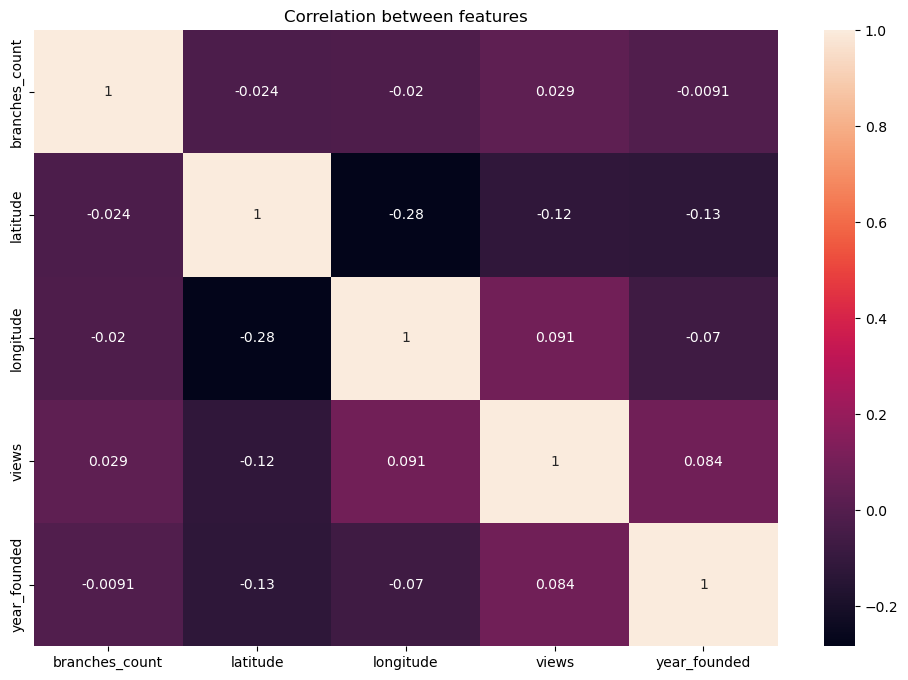

In [6]:
# draw a heatmap to show the correlation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df_attacked.corr(), annot=True)
plt.title('Correlation between features')
plt.show()

In [7]:
df_unattacked.describe()

,_id,link,last_seen,ispublished,views,deadline,content,source,branches_count,year_founded,longitude,latitude,revenue,employees_count
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,824.000000,691.000000,385.000000,385.000000,1.580000e+02,299.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.151699,1975.059334,-88.375356,38.513824,6.012416e+09,16939.498328
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.263112,49.247564,29.769218,8.510208,1.861244e+10,51395.281230
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1534.000000,-123.133619,-33.751376,0.000000e+00,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1965.000000,-114.006668,34.144608,1.254367e+07,58.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1992.000000,-85.589420,39.947420,2.252800e+08,323.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2005.000000,-76.856810,42.445267,4.602047e+09,2798.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3690.000000,2022.000000,151.244593,54.928532,1.431100e+11,309630.000000


C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\3134112052.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



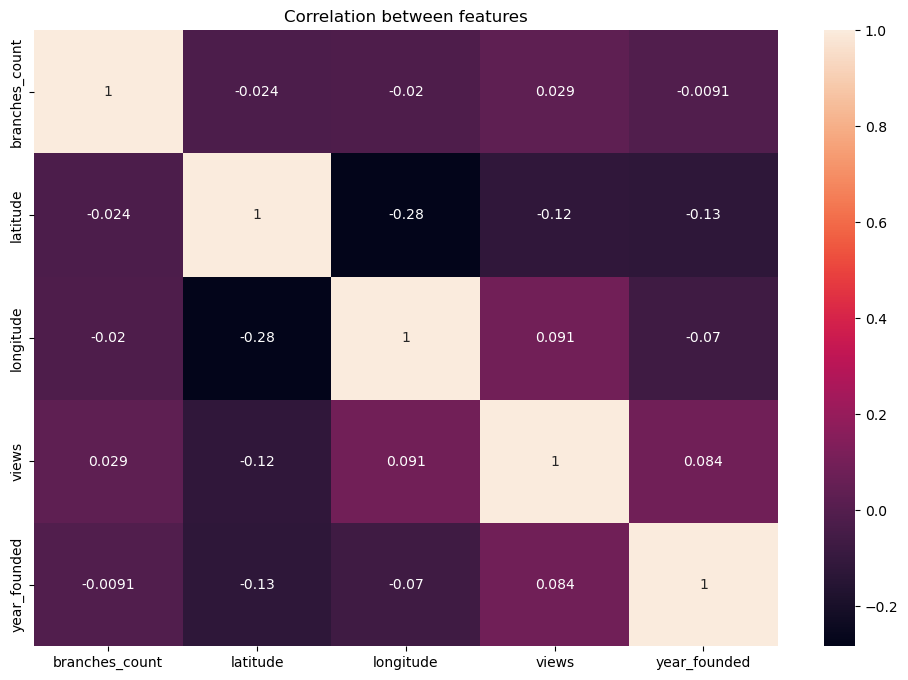

In [8]:
# draw a heatmap to show the correlation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df_attacked.corr(), annot=True)
plt.title('Correlation between features')
plt.show()

In [10]:
# check the data types
df_attacked.dtypes

_id                   object
branches_count       float64
company_name          object
company_status        object
content               object
country               object
deadline              object
description           object
display_name          object
employees_count       object
employees_range       object
industry              object
ispublished           object
last_seen             object
latitude             float64
link                  object
longitude            float64
revenue               object
revenue_range         object
source                object
technologies_used     object
views                float64
year_founded         float64
dtype: object

In [11]:
# check the missing values
df_attacked.isnull().sum()

_id                     0
branches_count        183
company_name            0
company_status        183
content               122
country               183
deadline              703
description           318
display_name          183
employees_count       880
employees_range       486
industry              280
ispublished             0
last_seen               0
latitude              928
link                    0
longitude             928
revenue              1187
revenue_range         456
source                  0
technologies_used       0
views                 472
year_founded          416
dtype: int64

In [12]:
df_unattacked.isnull().sum()

_id                  0
link                 0
last_seen            0
ispublished          0
views                0
deadline             0
company_name         0
content              0
source               0
branches_count       0
display_name         0
country              0
industry             0
revenue_range        0
employees_range      0
year_founded         0
description          0
longitude            0
latitude             0
company_status       0
revenue              0
employees_count      0
technologies_used    0
dtype: int64

In [13]:
# check the number of unique values for each column
df_attacked.nunique(axis=0)

_id                  1501
branches_count         29
company_name         1486
company_status          1
content              1374
country                76
deadline              755
description          1165
display_name         1300
employees_count       445
employees_range        39
industry              109
ispublished             7
last_seen             791
latitude              562
link                 1501
longitude             561
revenue               258
revenue_range          30
source                  6
technologies_used     365
views                1011
year_founded          161
dtype: int64

In [14]:
df_unattacked.nunique(axis=0)

_id                    1
link                   1
last_seen              1
ispublished            1
views                  1
deadline               1
company_name         694
content                1
source                 1
branches_count        40
display_name         775
country               64
industry             103
revenue_range          8
employees_range        9
year_founded         140
description          656
longitude            359
latitude             359
company_status         1
revenue              143
employees_count      221
technologies_used    342
dtype: int64

# Data Cleaning and Preparation

In [15]:
# get the unique values for ispublished column
df_attacked['ispublished'].unique()

array([True, False, '100%', '0%', '103%', '10%', '30%'], dtype=object)

In [16]:
# edit the ispublished column such that if value == "0%" or False, then change to False else change to True
df_attacked['ispublished'] = df_attacked['ispublished'].apply(lambda x: False if x == "0%" or x==False else True)
df_attacked['ispublished'].unique()

array([ True, False])

In [17]:
# print the unique values for 'revenue_range' column
print(df_attacked['revenue_range'].unique())
def convert_revenue_range_to_average(revenue_range):
    if pd.isnull(revenue_range):
        return revenue_range
    revenue_range = str(revenue_range)

    if '>' in revenue_range or '<' in revenue_range:
        revenue_range = revenue_range.replace('>', '')
        revenue_range = revenue_range.replace('<', '')
        revenue_range = revenue_range.replace(' ', '')
        revenue_range = revenue_range.replace('$', '')
        revenue_range = revenue_range.replace(',', '')
        if 'B' in revenue_range:
            revenue_range = revenue_range.replace('B', '')
            revenue_range = float(revenue_range) * 1e9
        elif 'M' in revenue_range:
            revenue_range = revenue_range.replace('M', '')
            revenue_range = float(revenue_range) * 1e6
        else:
            revenue_range = float(revenue_range)
        return revenue_range
    elif '-' in revenue_range:
        lower, upper = revenue_range.split(' - ')
        lower = lower.replace(' ', '')
        lower = lower.replace('$', '')
        lower = lower.replace(',', '')
        upper = upper.replace(' ', '')
        upper = upper.replace('$', '')
        upper = upper.replace(',', '')
        if 'B' in lower:
            lower = lower.replace('B', '')
            lower = float(lower) * 1e9
        elif 'M' in lower:
            lower = lower.replace('M', '')
            lower = float(lower) * 1e6
        else:
            lower = float(lower)
        if 'B' in upper:
            upper = upper.replace('B', '')
            upper = float(upper) * 1e9
        elif 'M' in upper:
            upper = upper.replace('M', '')
            upper = float(upper) * 1e6
        else:
            upper = float(upper)
        
        return (lower + upper) / 2
    else:
        revenue_range = revenue_range.replace(' ', '')
        revenue_range = revenue_range.replace('$', '')
        revenue_range = revenue_range.replace(',', '')
        if 'Million' in revenue_range:
            revenue_range = revenue_range.replace('Million', '')
            revenue_range = float(revenue_range) * 1e6
        elif 'Billion' in revenue_range:
            revenue_range = revenue_range.replace('Billion', '')
            revenue_range = float(revenue_range) * 1e9
        elif 'B' in revenue_range:
            revenue_range = revenue_range.replace('B', '')
            revenue_range = float(revenue_range) * 1e9
        elif 'M' in revenue_range:
            revenue_range = revenue_range.replace('M', '')
            revenue_range = float(revenue_range) * 1e6
        
        else:
            revenue_range = float(revenue_range)
        return revenue_range
new_df = df_attacked.copy()
# convert the 'revenue_range' column from Series object to numeric
new_df['revenue_range'] = new_df['revenue_range'].apply(convert_revenue_range_to_average)
print(df_attacked['revenue_range'].unique())
print(new_df['revenue_range'].unique())
# drop the id column
new_df.drop('_id', axis=1, inplace=True)
new_df.drop('last_seen', axis=1, inplace=True)
new_df.drop('link', axis=1, inplace=True)

[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M' '$129,7M' '$516M' '$303,7M' '$19,2M' '$168M' '$5M' '$37.2M'
 '$22M' '$879M' '$5B' '$9M' '$19M' '$343 Million' '$5 Million'
 '$$653 Million' '$14' '$14M' '$669M' '$33M' '$310M' '$19' '$10M'
 '$7 Million']
[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M' '$129,7M' '$516M' '$303,7M' '$19,2M' '$168M' '$5M' '$37.2M'
 '$22M' '$879M' '$5B' '$9M' '$19M' '$343 Million' '$5 Million'
 '$$653 Million' '$14' '$14M' '$669M' '$33M' '$310M' '$19' '$10M'
 '$7 Million']
[      nan 6.000e+08 1.000e+09 5.000e+05 3.000e+07 5.500e+06 1.500e+08
 7.500e+07 1.297e+09 5.160e+08 3.037e+09 1.920e+08 1.680e+08 5.000e+06
 3.720e+07 2.200e+07 8.790e+08 5.000e+09 9.000e+06 1.900e+07 3.430e+08
 6.530e+08 1.400e+01 1.400e+07 6.690e+08 3.300e+07 3.100e+08 1.900e+01
 1.000e+07 7.000e+06]


In [18]:
new_df_unattacked = df_unattacked.copy()
# convert the 'revenue_range' column from Series object to numeric
new_df_unattacked['revenue_range'] = new_df_unattacked['revenue_range'].apply(convert_revenue_range_to_average)
print(df_unattacked['revenue_range'].unique())
print(new_df_unattacked['revenue_range'].unique())
# drop the id column
new_df_unattacked.drop('_id', axis=1, inplace=True)
new_df_unattacked.drop('last_seen', axis=1, inplace=True)
new_df_unattacked.drop('link', axis=1, inplace=True)


[1 2 3 4 0 5 6 7]
[1. 2. 3. 4. 0. 5. 6. 7.]


In [19]:
print(new_df['employees_range'].unique())
# process the 'employees_range' column
def convert_range_employee_to_average(employees_range):
  if pd.isnull(employees_range):
    return employees_range
  employees_range = str(employees_range)
  employees_range = employees_range.replace(',', '')
  employees_range = employees_range.replace('~', '')
  if '>' in employees_range or '<' in employees_range:
    employees_range = employees_range.replace('>', '')
    employees_range = employees_range.replace('<', '')
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    if 'K' in employees_range:
      employees_range = employees_range.replace('K', '')
      employees_range = int(employees_range) * 1e3
    elif 'M' in employees_range:
      employees_range = employees_range.replace('M', '')
      employees_range = int(employees_range) * 1e6
    else:
      employees_range = int(employees_range)
    return employees_range
  elif '-' in employees_range:
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    employees_range = employees_range.split('-')
    lower = float(employees_range[0])
    upper = float(employees_range[1])
  elif 'Employees' in employees_range:
    employees_range = employees_range.replace('Employees', '')
    employees_range = employees_range.replace(' ', '')
    
    return int(employees_range)
  else:
    lower = float(employees_range)
    upper = float(employees_range)

  return (lower + upper) / 2

new_df['employees_range'] = new_df['employees_range'].apply(convert_range_employee_to_average)
print(new_df['employees_range'].unique())

new_df_unattacked['employees_range'] = new_df_unattacked['employees_range'].apply(convert_range_employee_to_average)
print(new_df_unattacked['employees_range'].unique())

[nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000' '264' '1900' '8,312' '451' '2014'
 '100' '~1000' '25' '18' '75' '2,978' '5' '2000' '41' '94' '50' '725'
 '1.559' '10' '45' '6208' '223' '259' '4,178 Employees' '126' '1420' '51'
 '43' '4' '16' '20']
[      nan 3.000e+03 7.500e+03 5.500e+00 3.500e+02 3.000e+01 1.250e+02
 7.500e+02 1.000e+04 2.640e+02 1.900e+03 8.312e+03 4.510e+02 2.014e+03
 1.000e+02 1.000e+03 2.500e+01 1.800e+01 7.500e+01 2.978e+03 5.000e+00
 2.000e+03 4.100e+01 9.400e+01 5.000e+01 7.250e+02 1.559e+00 1.000e+01
 4.500e+01 6.208e+03 2.230e+02 2.590e+02 4.178e+03 1.260e+02 1.420e+03
 5.100e+01 4.300e+01 4.000e+00 1.600e+01 2.000e+01]
[1. 2. 3. 4. 5. 0. 6. 7. 8.]


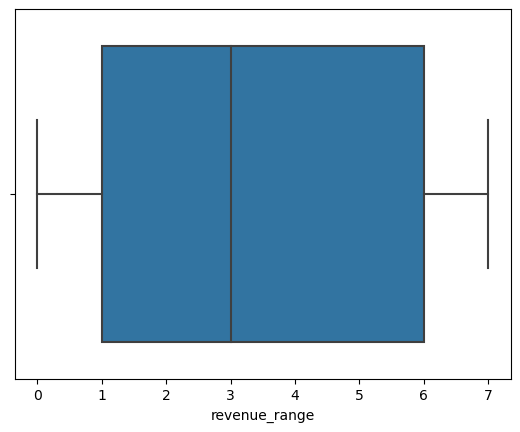

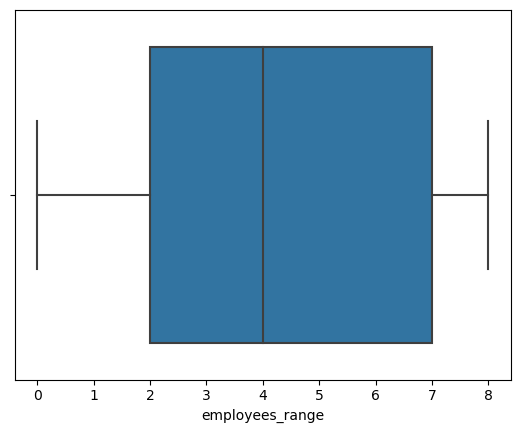

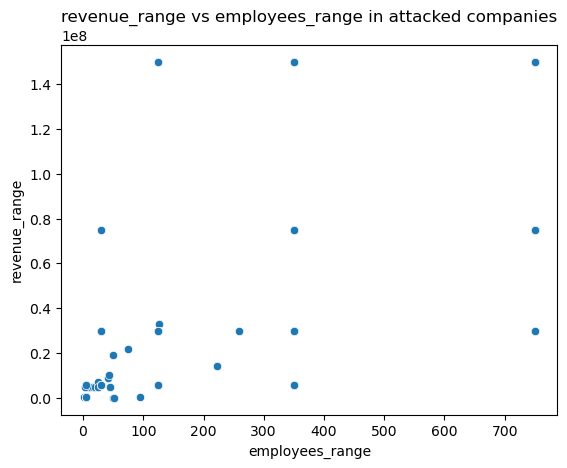

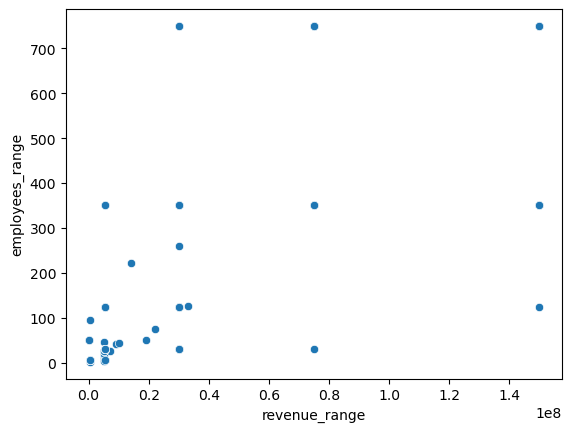

In [20]:
# plot the raltionship between 'revenue_range' and 'employees_range' using a line plot
# remove the rows with missing values in 'revenue_range' and 'employees_range' columns
new_df = new_df.dropna(subset=['revenue_range', 'employees_range'])
# remove the outliers
## get the interquartile range
q1 = new_df['revenue_range'].quantile(0.25)
q3 = new_df['revenue_range'].quantile(0.75)
iqr = q3 - q1
# draw the boxplot for 'revenue_range' column
sns.boxplot(x=new_df_unattacked['revenue_range'])
plt.show()
## remove the outliers
new_df = new_df[(new_df['revenue_range'] >= q1 - 1.5 * iqr) & (new_df['revenue_range'] <= q3 + 1.5 * iqr)]
## get the interquartile range
q1 = new_df['employees_range'].quantile(0.25)
q3 = new_df['employees_range'].quantile(0.75)
iqr = q3 - q1
# draw the boxplot for 'revenue_range' column
sns.boxplot(x=new_df_unattacked['employees_range'])
plt.show()
## remove the outliers
new_df = new_df[(new_df['employees_range'] >= q1 - 1.5 * iqr) & (new_df['employees_range'] <= q3 + 1.5 * iqr)]
# plot the scatter plot
plt.title('revenue_range vs employees_range in attacked companies')
sns.scatterplot(x='employees_range', y='revenue_range', data=new_df)
plt.show()
sns.scatterplot(x='revenue_range', y='employees_range', data=new_df)
plt.show()
# add title and axis labels
# plt.title('revenue_range vs employees_range in attacked companies')
# sns.lineplot(x='employees_range', y='revenue_range', data=new_df)
# plt.show()
# sns.lineplot(x='revenue_range', y='employees_range', data=new_df)
# plt.show()

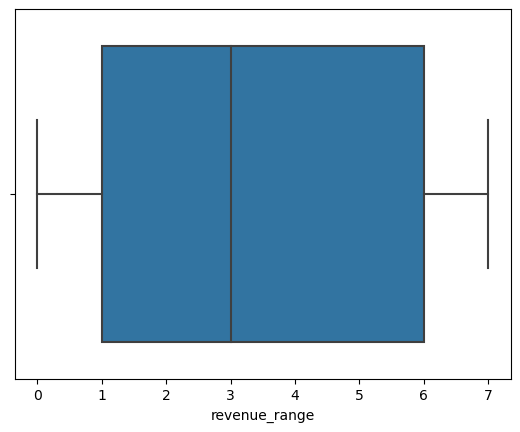

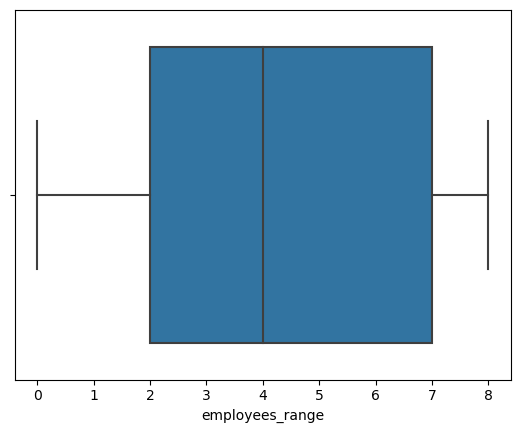

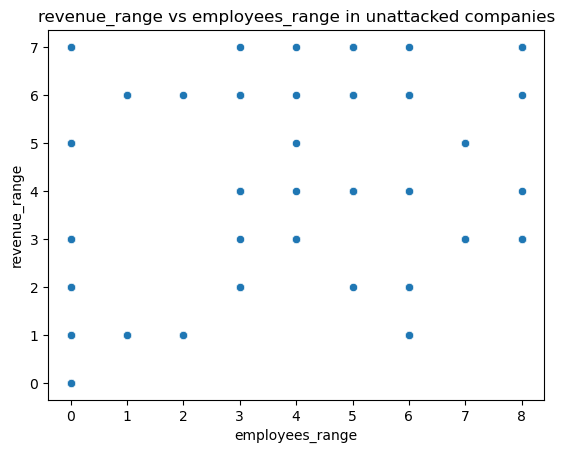

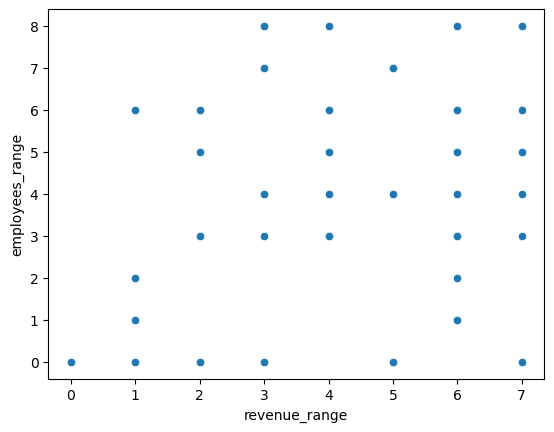

In [21]:
new_df_unattacked = new_df_unattacked.dropna(subset=['revenue_range', 'employees_range'])
q1 = new_df_unattacked['revenue_range'].quantile(0.25)
q3 = new_df_unattacked['revenue_range'].quantile(0.75)
iqr = q3 - q1
# draw the boxplot for 'revenue_range' column
sns.boxplot(x=new_df_unattacked['revenue_range'])
plt.show()
## remove the outliers
new_df_unattacked = new_df_unattacked[(new_df_unattacked['revenue_range'] >= q1 - 1.5 * iqr) & (new_df_unattacked['revenue_range'] <= q3 + 1.5 * iqr)]
## get the interquartile range
q1 = new_df_unattacked['employees_range'].quantile(0.25)
q3 = new_df_unattacked['employees_range'].quantile(0.75)
iqr = q3 - q1
# draw the boxplot for 'revenue_range' column
sns.boxplot(x=new_df_unattacked['employees_range'])
plt.show()
## remove the outliers
new_df_unattacked = new_df_unattacked[(new_df_unattacked['employees_range'] >= q1 - 1.5 * iqr) & (new_df_unattacked['employees_range'] <= q3 + 1.5 * iqr)]
plt.title('revenue_range vs employees_range in unattacked companies')
sns.scatterplot(x='employees_range', y='revenue_range', data=new_df_unattacked)
plt.show()
sns.scatterplot(x='revenue_range', y='employees_range', data=new_df_unattacked)
plt.show()

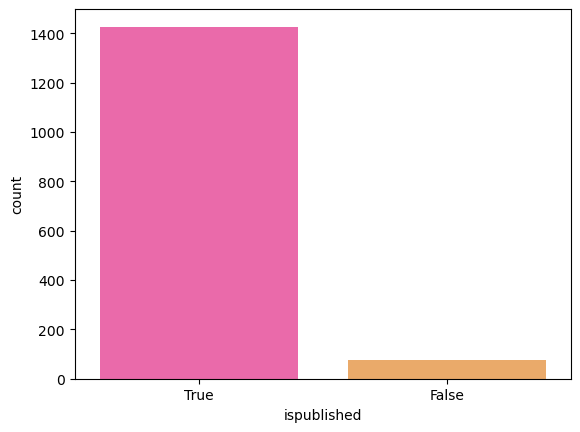

In [22]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
sns.countplot(x='ispublished', data=df_attacked, palette='spring', linewidth=1, order=df_attacked['ispublished'].value_counts().index)
plt.show()

# EDA

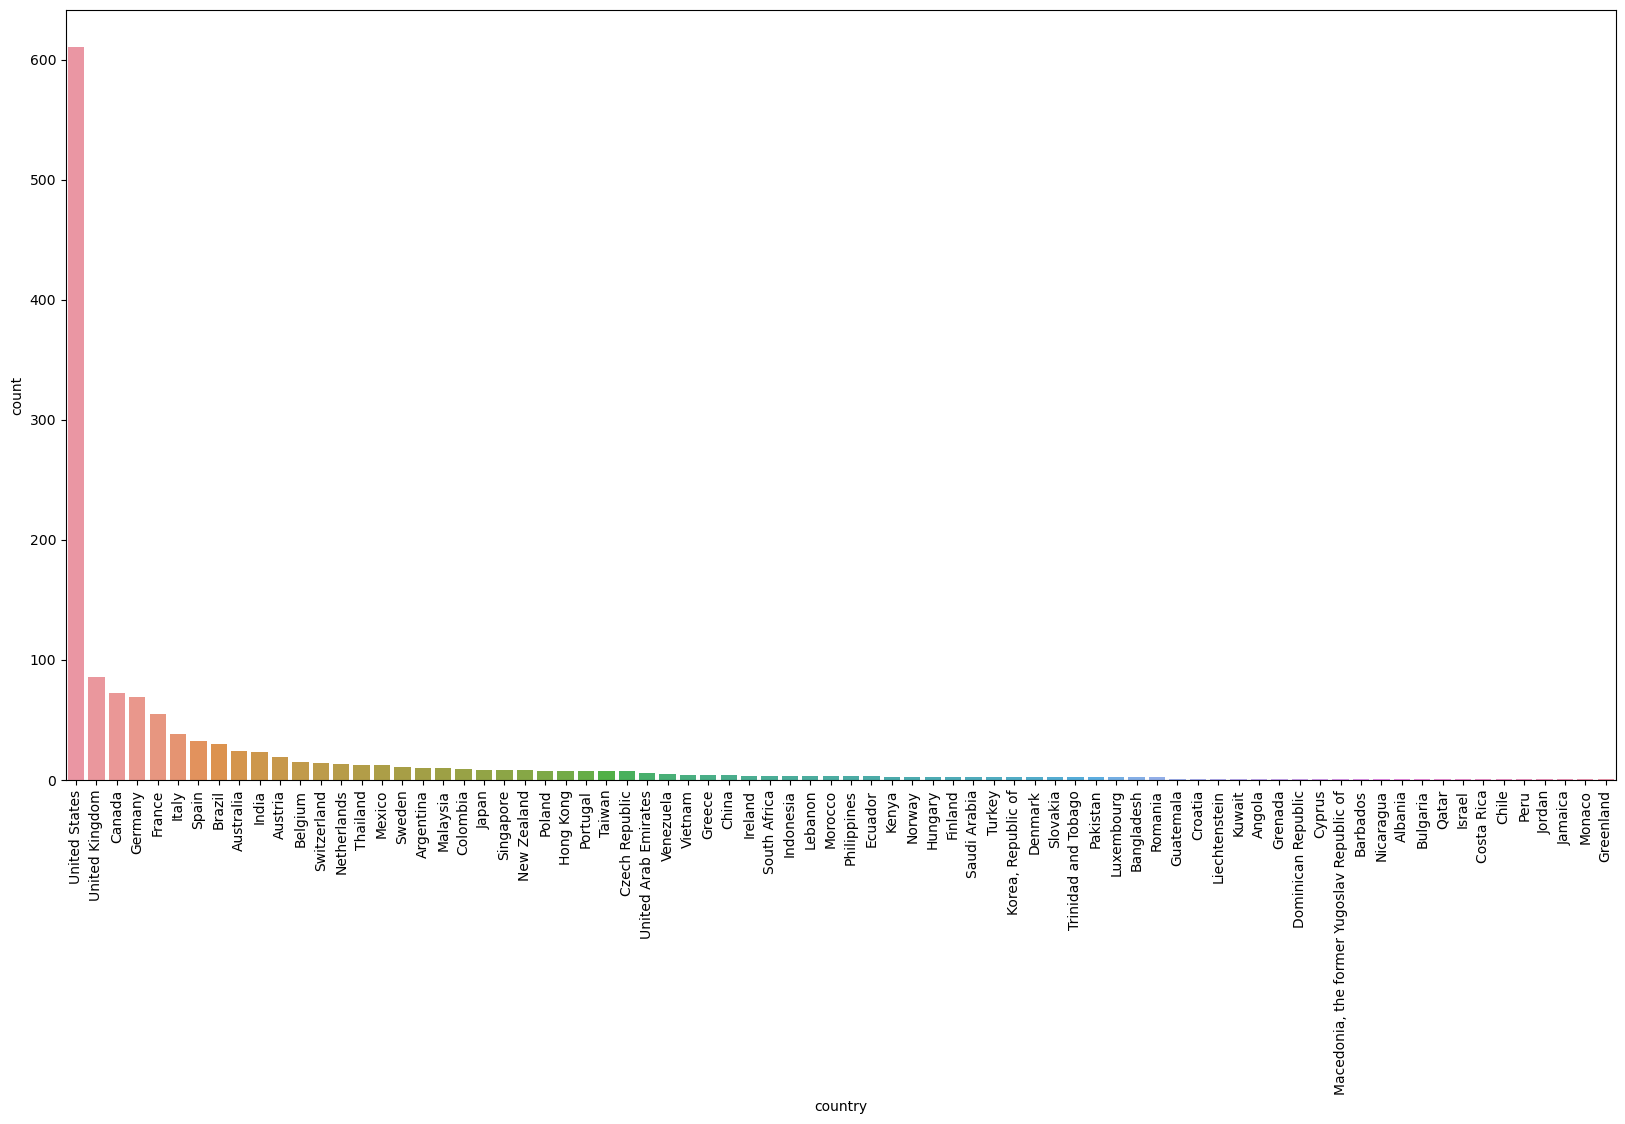

In [23]:
# plot the number of samples for each country and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=df_attacked, order=df_attacked['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

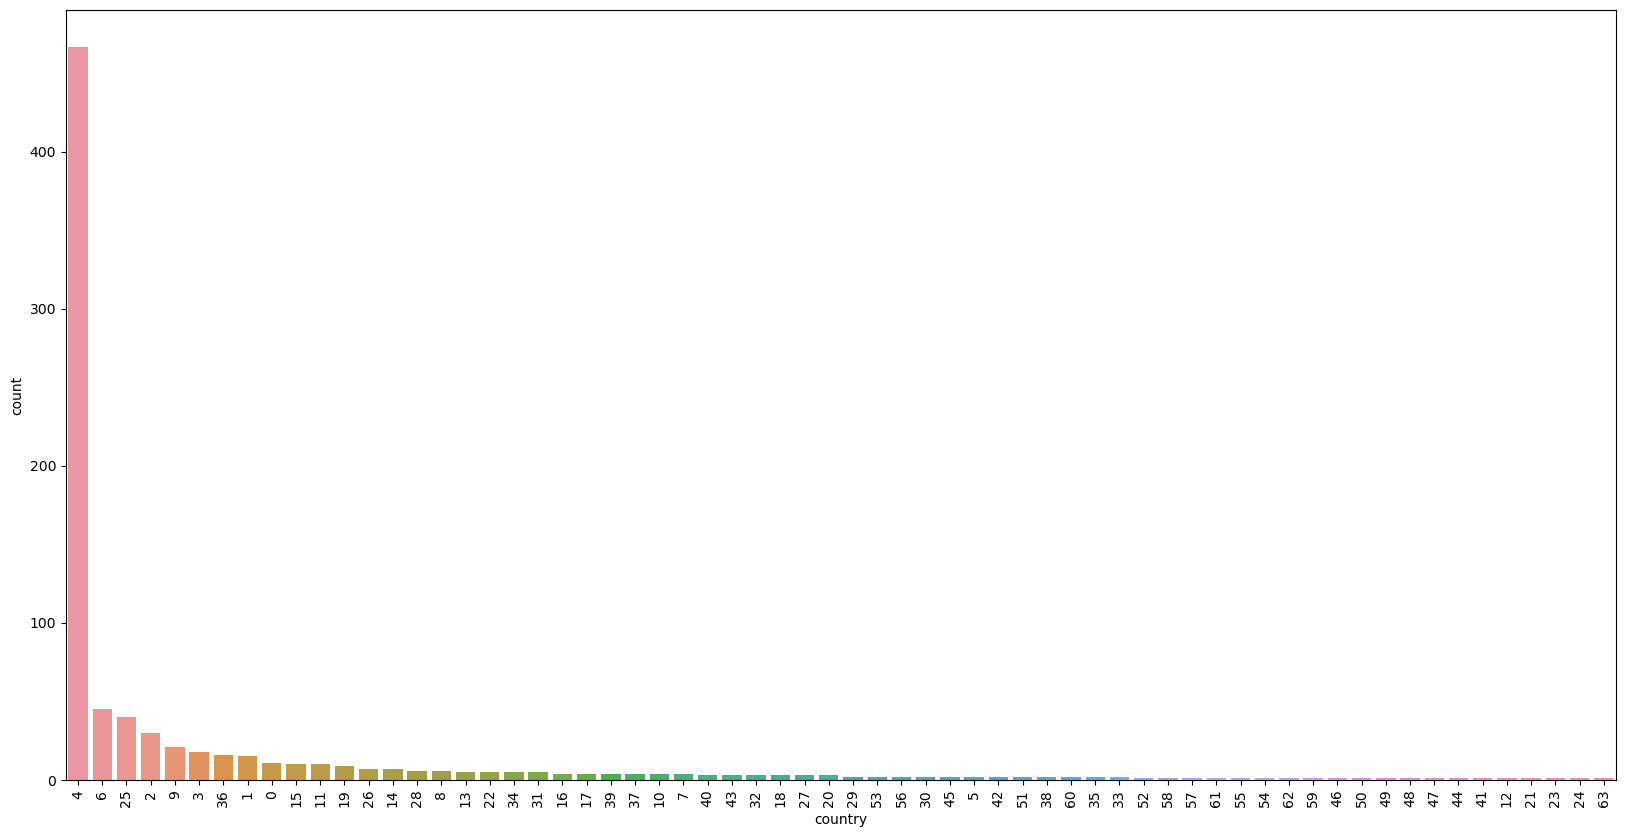

In [24]:
#unattacked companies
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=df_unattacked, order=df_unattacked['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

(1045, 23)
[30000000.  5500000. 75000000. 37200000. 22000000.  9000000. 19000000.
 14000000. 33000000. 10000000.  7000000.]


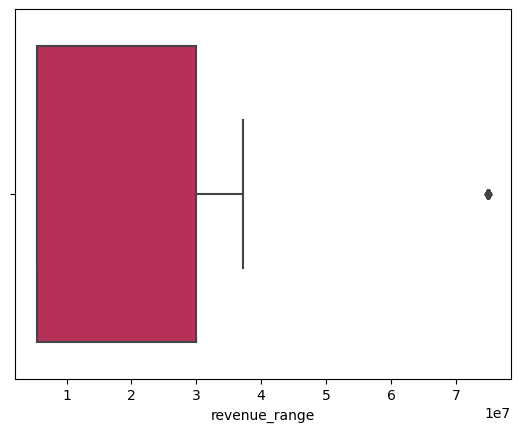

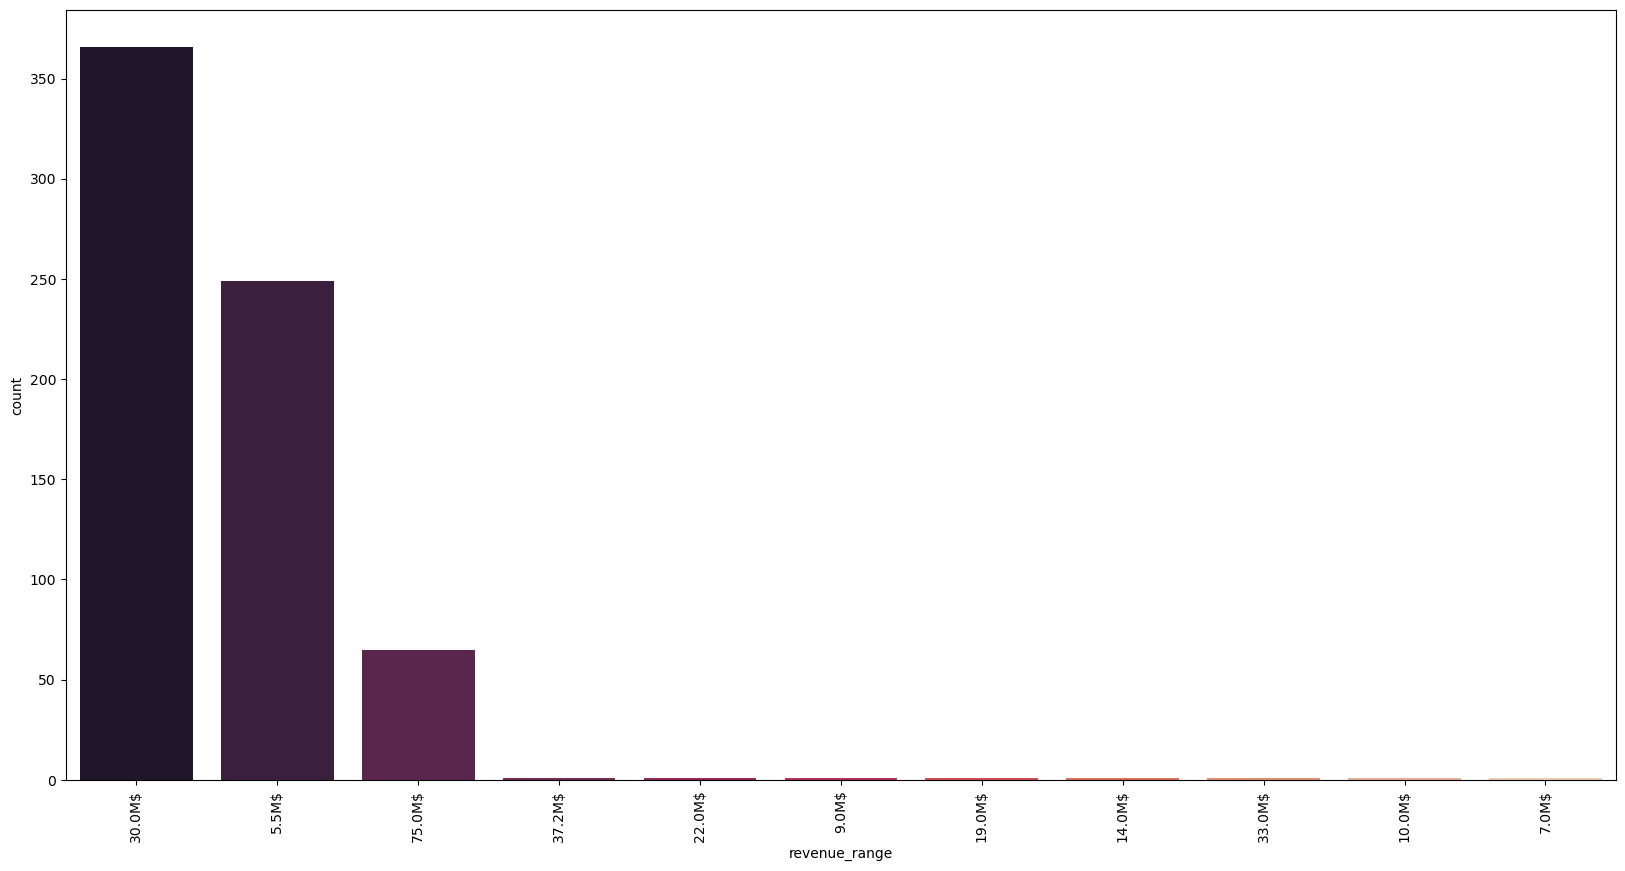

In [25]:
new_df = df_attacked.copy()
new_df['revenue_range'] = new_df['revenue_range'].apply(convert_revenue_range_to_average)
# remove the rows with missing values in 'revenue_range'
new_df = new_df.dropna(subset=['revenue_range'])
print(new_df.shape)

# sns.boxplot(new_df['revenue_range'], palette='rocket')
# plt.show()
# remove the outliers from 'revenue_range' column using percentile approach
q1 = new_df['revenue_range'].quantile(0.25)
q3 = new_df['revenue_range'].quantile(0.75)
iqr = q3 - q1
new_df = new_df[(new_df['revenue_range'] >= q1) & (new_df['revenue_range'] <= q3)]

# get the unique values for 'revenue_range' column
print(new_df['revenue_range'].unique())
# plot the box plot
sns.boxplot(x='revenue_range', data=new_df, palette='rocket')
plt.show()
# group the data by revenue_range and count the number of samples for each revenue_range
new_df.groupby('revenue_range').size()
# plot the number of samples for each revenue_range and format the revenue_range values to be displayed in millions
plt.figure(figsize=(20, 10))
# sort by the revenue_range values not count
# format the revenue_range values to be displayed in millions
new_df['revenue_range'] = new_df['revenue_range'].apply(lambda x: x / 1e6)
# add M$ to the end of each revenue_range value
new_df['revenue_range'] = new_df['revenue_range'].apply(lambda x: str(x) + 'M$')

sns.countplot(x='revenue_range', data=new_df, palette='rocket', linewidth=1, order=new_df['revenue_range'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

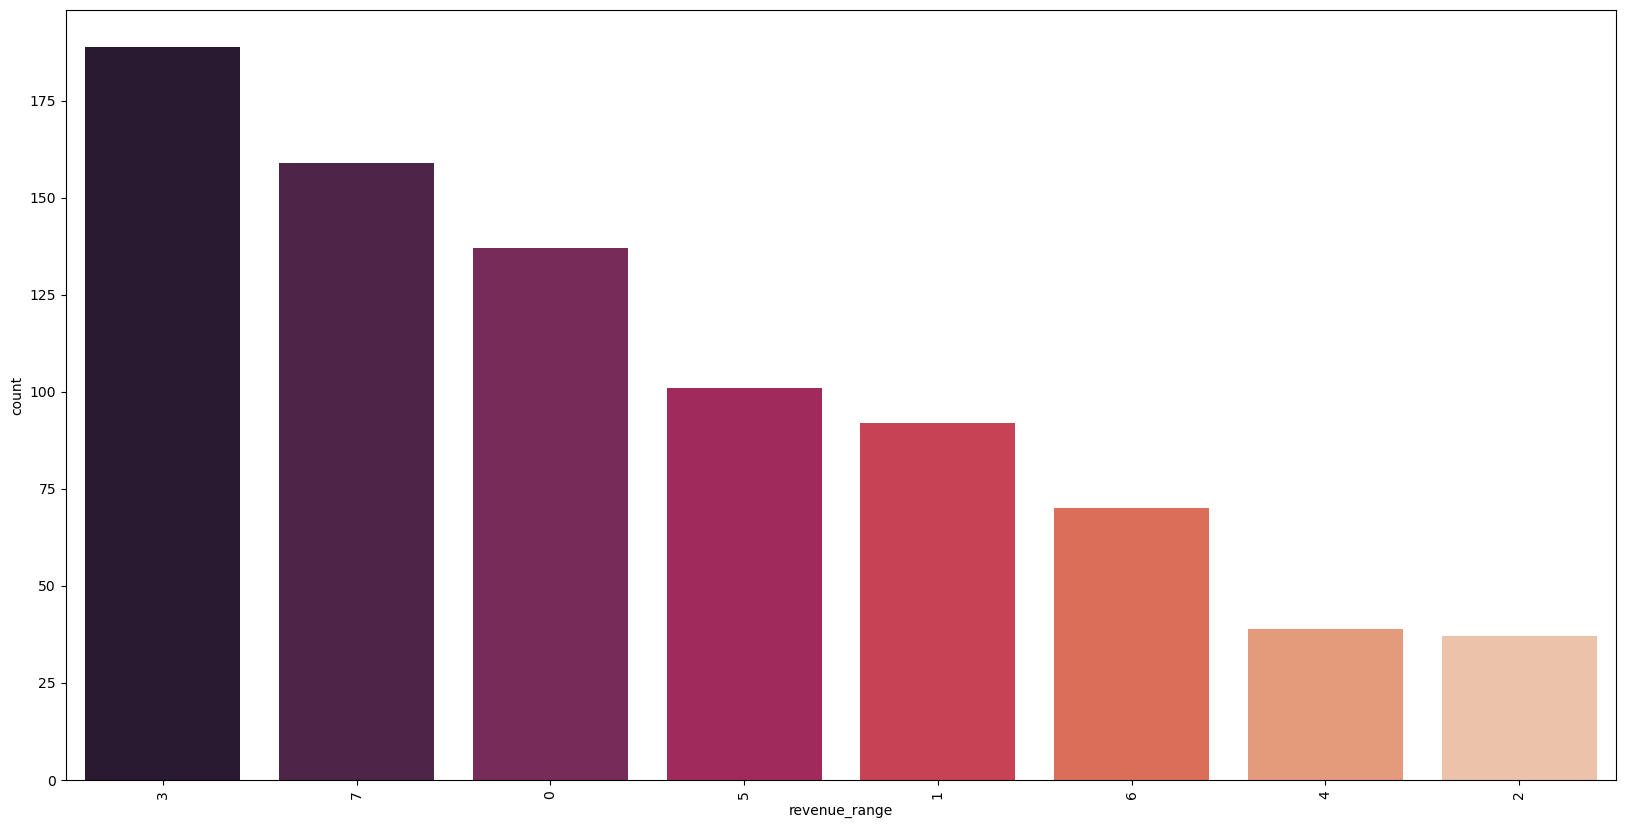

In [26]:
# unattacked campanies
df_unattacked.groupby('revenue_range').size()
plt.figure(figsize=(20, 10))
sns.countplot(x='revenue_range', data=df_unattacked, order=df_unattacked['revenue_range'].value_counts().index, palette= "rocket")
plt.xticks(rotation=90)
plt.show()

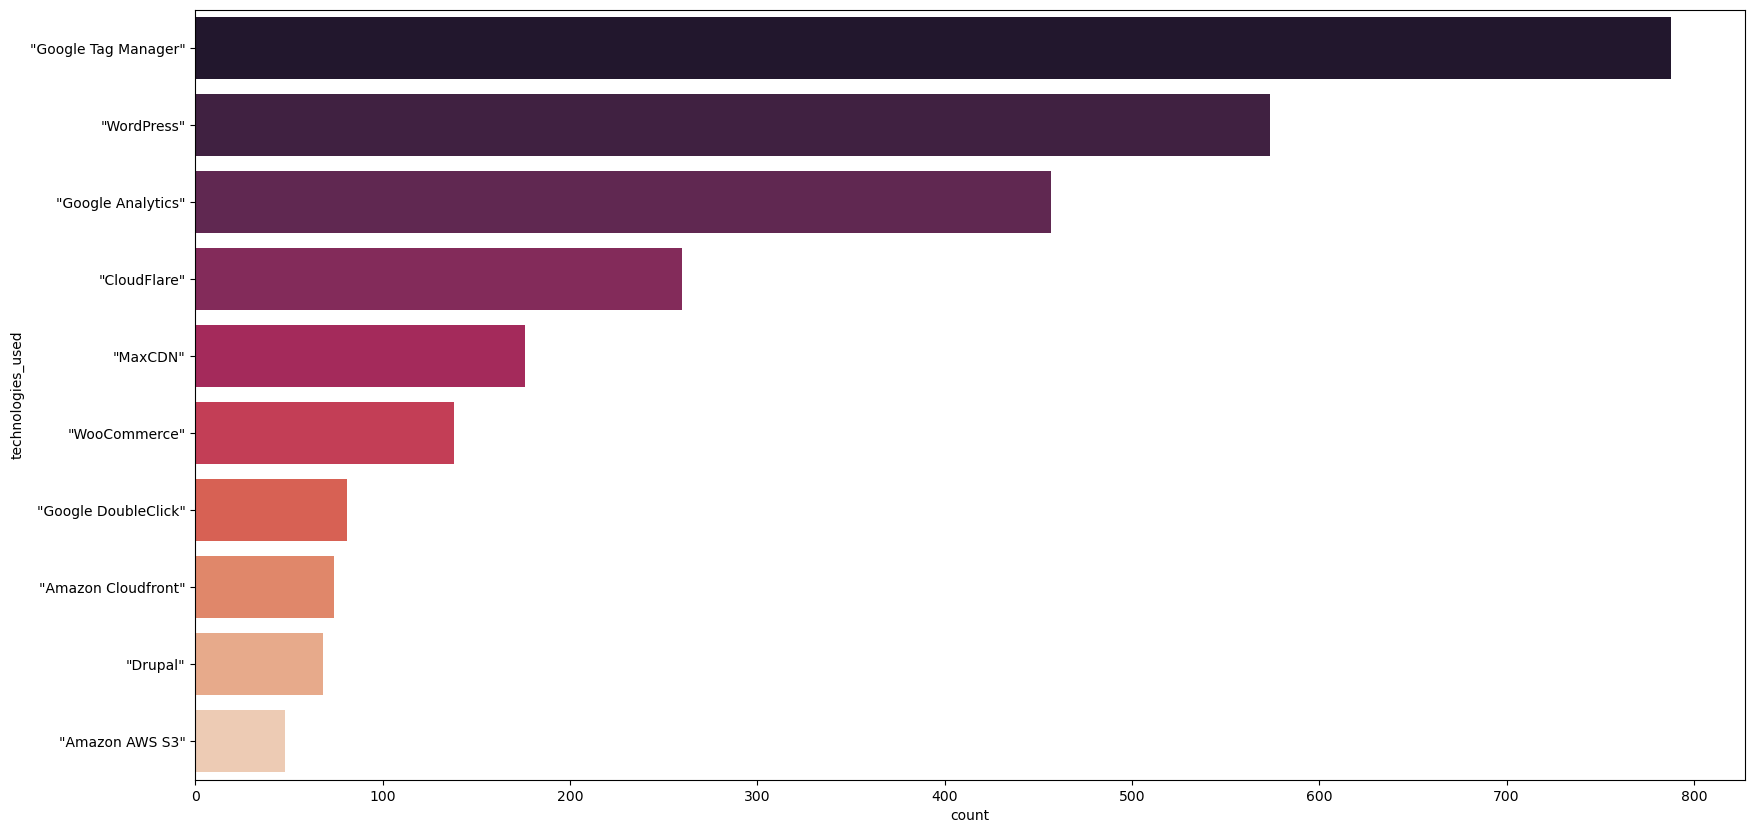

In [27]:
# count the number of empty lists in the `technologies_used` column
# count nulls first
df_attacked_new = df_attacked.copy()
col = df_attacked['technologies_used'].dropna()
# count empty lists
new_col = col.apply(lambda x:  1 if len(x)== 2 else 0)
col2= df_attacked.copy()
# drop nulls in the `technologies_used` column
col2.dropna(subset=['technologies_used'], inplace=True)
new_col2 = col2[col2["technologies_used"]!="[]"]

techs = new_col2['technologies_used'].apply(lambda x: x[1:-1].split(','))
#count each technology
techs = techs.explode()
# plot the top 10 technologies used by companies
plt.figure(figsize=(20, 10))
sns.countplot(y=techs, order=techs.value_counts().iloc[:10].index, palette="rocket")
plt.show()

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\864859180.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



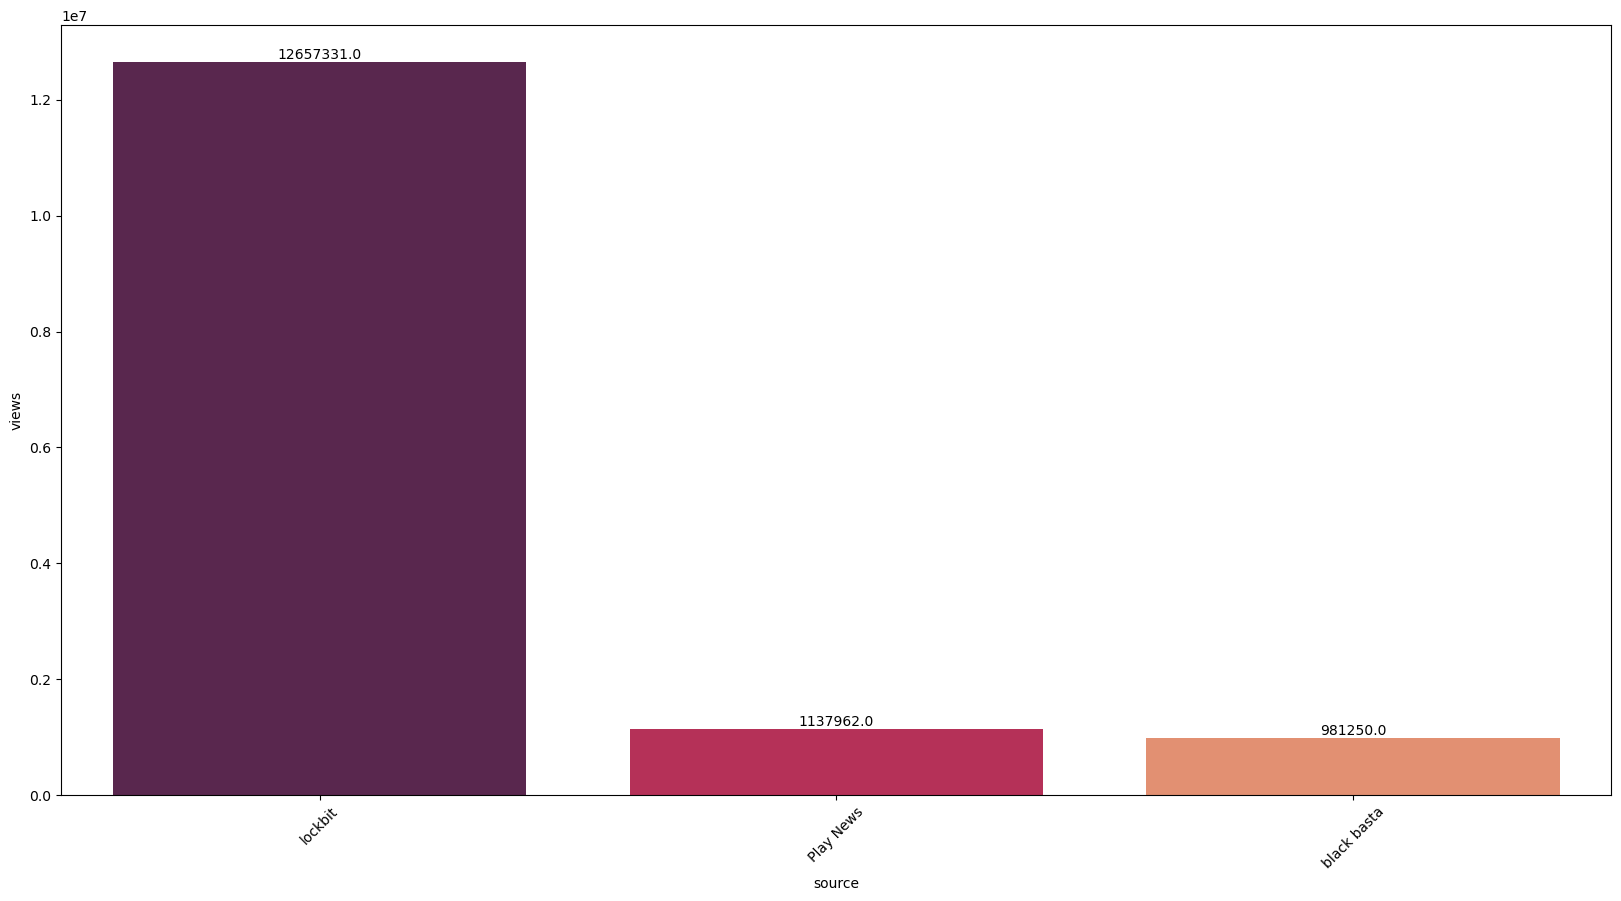

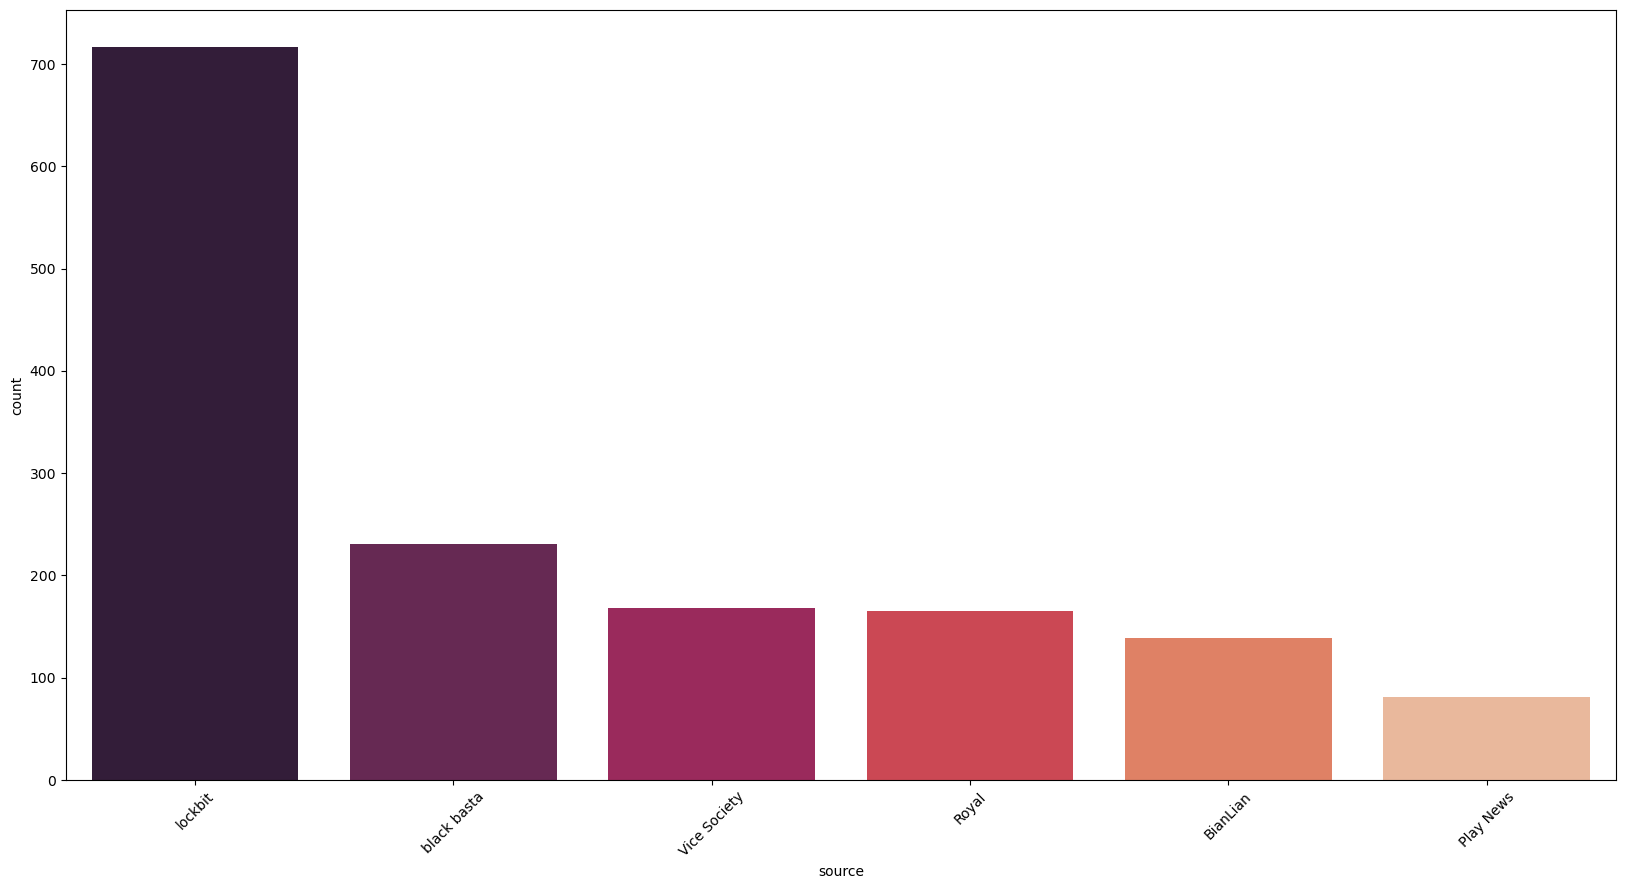

In [28]:
import matplotlib
# copy the data frame
new_df_views = df_attacked.copy()
# remove the rows with missing values in 'views' column
new_df_views = new_df_views.dropna(subset=['views'])
# sum the views for each source
new_df_views = new_df_views.groupby('source').sum()
# plot the bar plot and display the views sum for each source on the top of the bar
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=new_df_views.index, y='views', data=new_df_views, palette='rocket', order=new_df_views.sort_values('views', ascending=False).index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.show()
# plot source frequency
plt.figure(figsize=(20, 10))
sns.countplot(x='source', data=df_attacked, palette='rocket', order=df_attacked['source'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

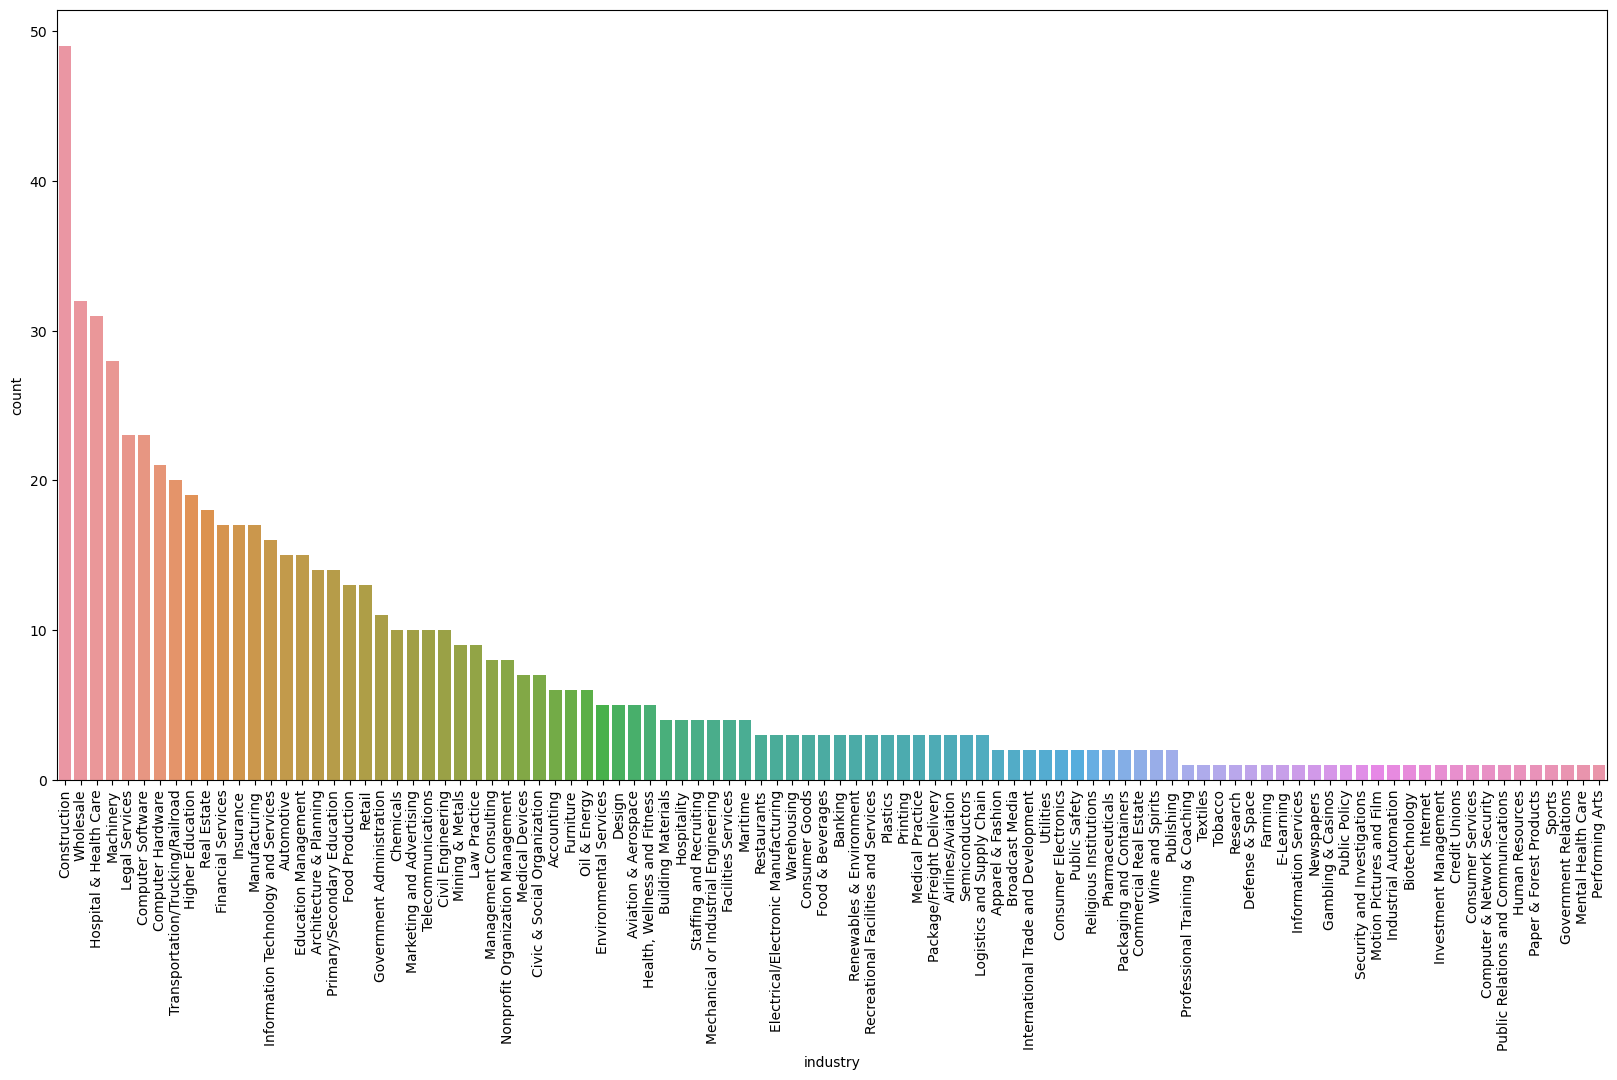

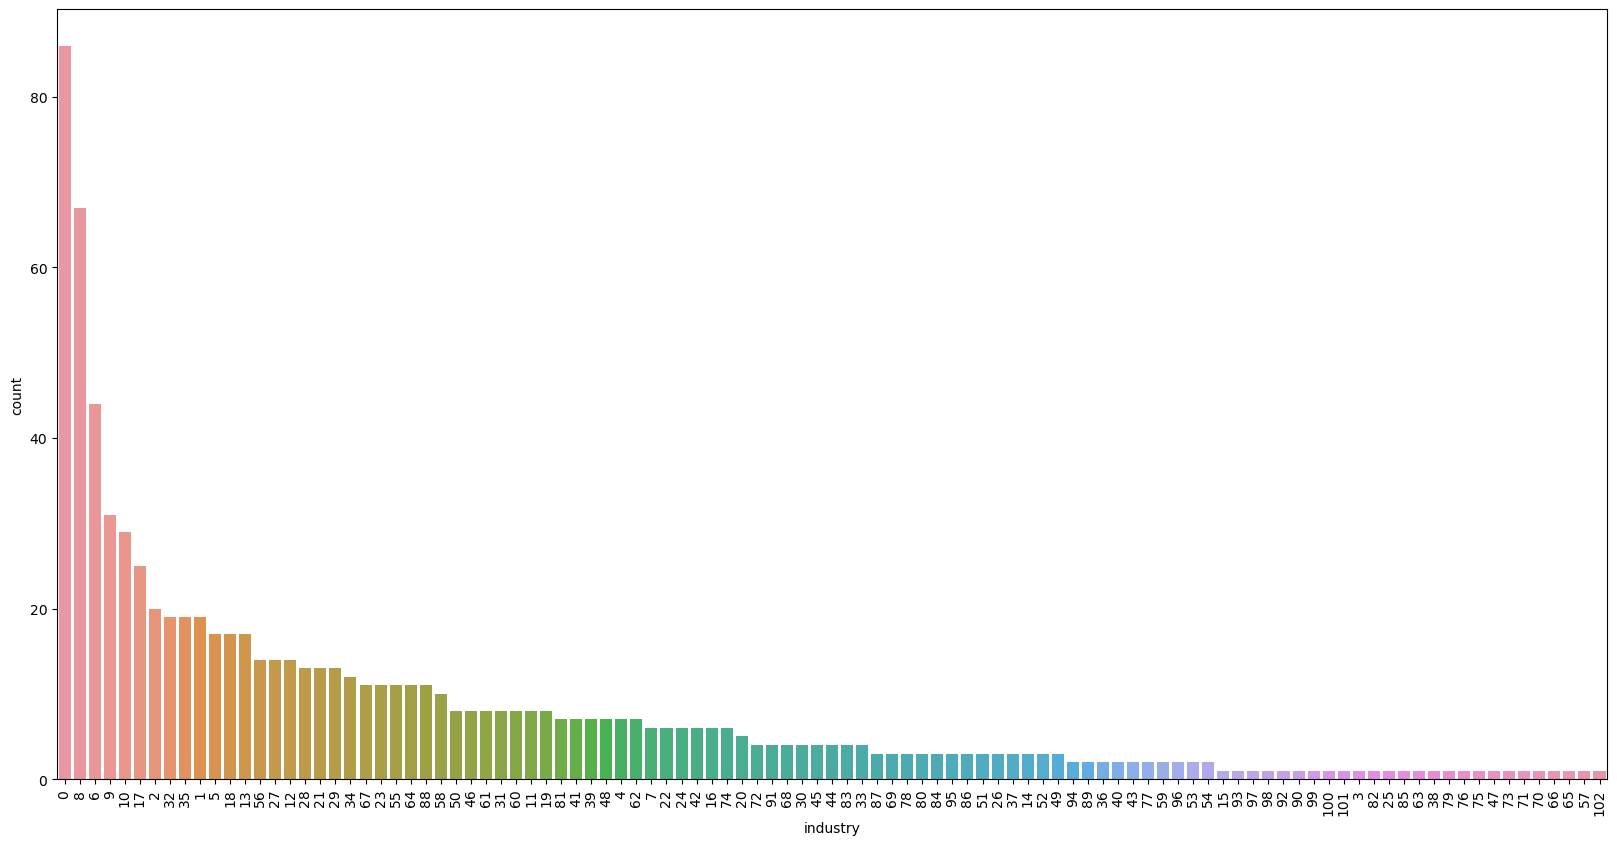

In [29]:
# print the unique values for 'industry' column
# print(new_df['industry'].unique())
# plot the number of samples for each industry and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df, order=new_df['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df_unattacked, order=new_df_unattacked['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [30]:
new_df_country_industry = df_attacked[df_attacked["country"] == "United States"]
# drop the rows with missing values in 'country' and 'industry' columns
new_df_country_industry = new_df_country_industry.dropna(subset=['country', 'industry'])
# group the data by 'country' and 'industry' and count the number of samples for each group
new_df_country_industry2 = new_df_country_industry.groupby(['country', 'industry']).size().reset_index(name='counts')
new_df_country_industry2.sorted = new_df_country_industry2.sort_values(by='counts', ascending=False)
new_df_country_industry2.sorted.head(10)

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\1940751479.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,country,industry,counts
16,United States,Construction,46
37,United States,Hospital & Health Care,36
82,United States,Wholesale,35
36,United States,Higher Education,25
46,United States,Legal Services,24
15,United States,Computer Software,21
14,United States,Computer Hardware,20
80,United States,Transportation/Trucking/Railroad,19
47,United States,Machinery,17
3,United States,Architecture & Planning,15


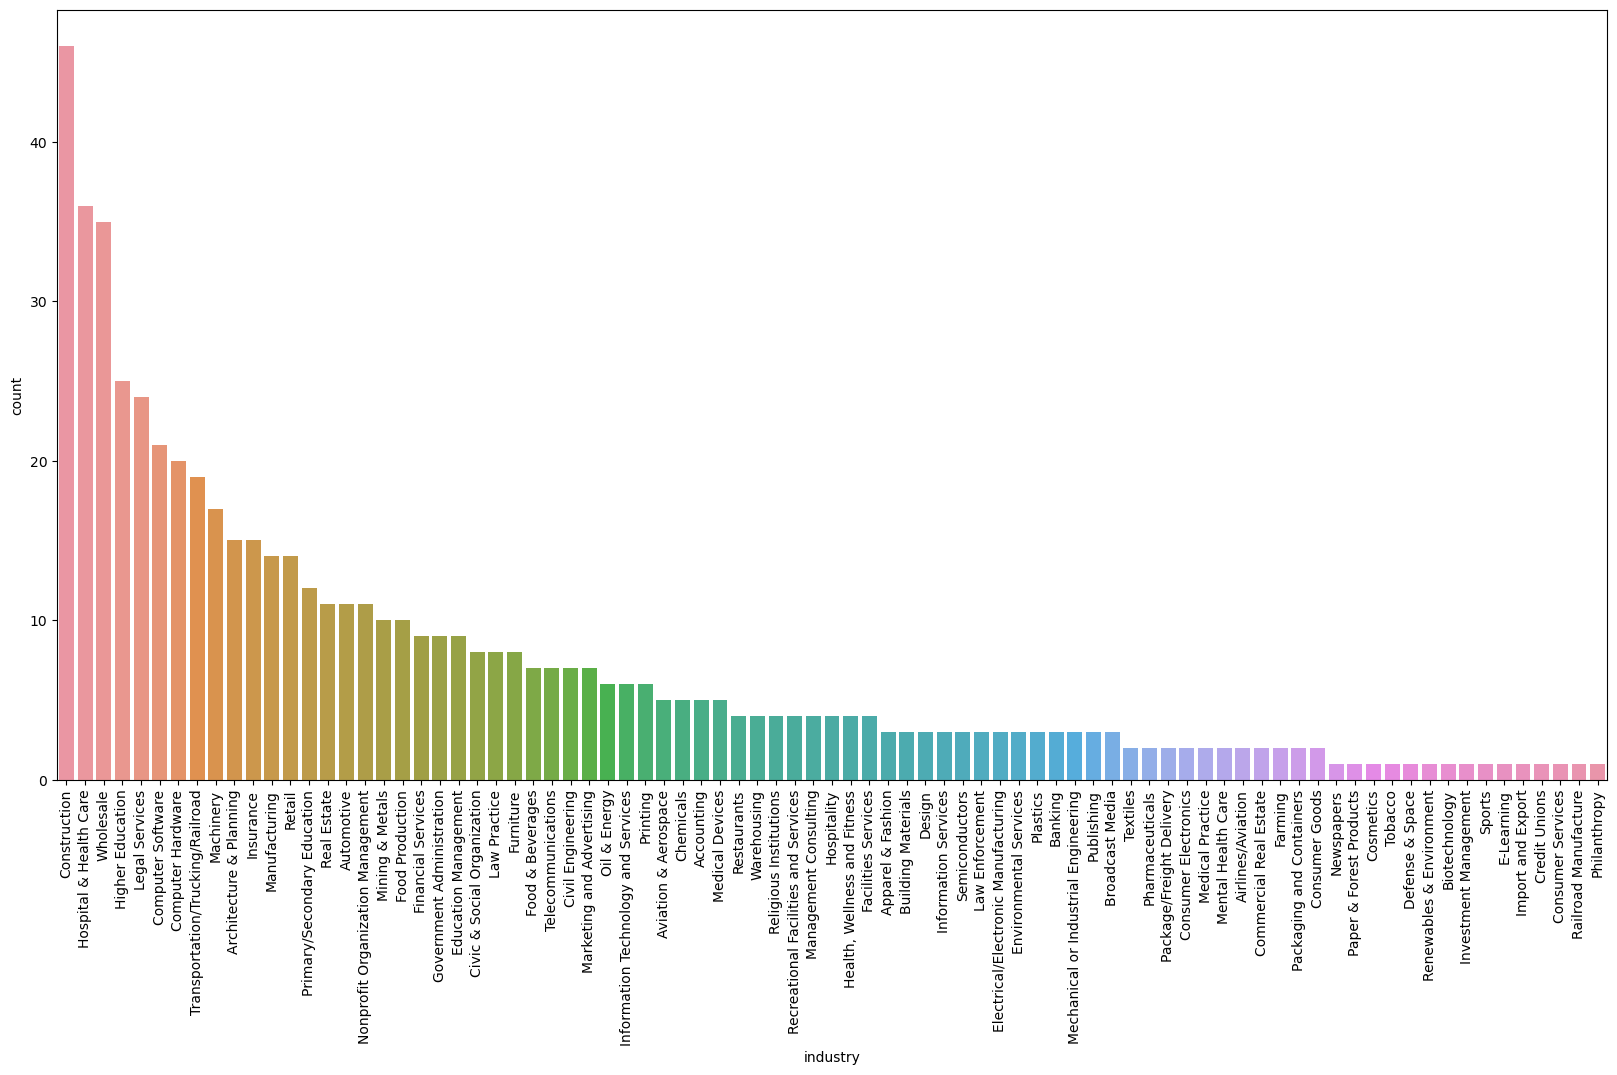

In [31]:
# plot the number of samples for each industry in the United States and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df_country_industry, order=new_df_country_industry['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [32]:
# we will try to answer the following question about the data: Are small companies in Europe vulnerable to attacks, given that companies in the USA rank among the countries most vulnerable to attacks ?

new_df_2 = df_attacked.copy()
# drop the rows with missing values in 'country' or 'employee_range' columns
new_df_2.dropna(subset=['country'], inplace=True)
print(new_df_2.shape)
# count the revenue_range nulls
print(new_df_2['revenue_range'].isnull().sum())
# drop the rows with missing values in 'employees_range' column
new_df_2.dropna(subset=['employees_range'], inplace=True)
print(new_df_2.shape)
# print the unique values for 'employees_range' column
print(new_df_2['employees_range'].unique())

(1318, 23)
283
(1006, 23)
['1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000' '264' '1900' '8,312' '451' '2014'
 '25' '18' '75' '2,978' '5' '41' '94' '50' '725' '1.559' '10' '45' '6208'
 '223' '259' '4,178 Employees' '126' '1420' '51' '43' '4']


In [33]:
# check if there are rows with null countries but not null longitude and latitude
df_attacked[(df_attacked['country'].isnull()) & (df_attacked['longitude'].notnull())]


,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded


In [34]:
# check if there are rows with null employee_range but not null country_range

# get the rows with null employee_range but not null country_range
new_df_1 = df_attacked[(df_attacked['employees_range'].notnull()) & (df_attacked['revenue_range'].isnull())]
new_df_1.shape

(0, 23)

In [35]:
new_df_1 = df_attacked[(df_attacked['country'].notnull()) & (df_attacked['employees_range'].isnull())]
new_df_1.shape

(312, 23)

In [36]:
from scipy.stats import chi2_contingency

def statistcal_test(df_attacked,miss_val_col,exp_col):
    # print(df_attacked[miss_val_col].isnull())
    true_col=df_attacked[df_attacked[miss_val_col].isnull()].groupby(exp_col)[exp_col].count()
    false_col=df_attacked[df_attacked[miss_val_col].notna()].groupby(exp_col)[exp_col].count()
    table= pd.concat([true_col,false_col],axis=1)
    table.columns=["True","False"]
    # replace nulls with 0
    table.fillna(0,inplace=True)
    print(table)
    chi2, p, dof, ex = chi2_contingency(table)
    print("The p-value with {} is equal to {}".format(exp_col,p))
    if p<0.05:
        # print("The missingness in the {} column depend on the {} one".format(miss_val_col,exp_col))
        print("it is exptected to be **MAR**")


df_attacked_detect_missings = df_attacked.copy()
# drop the rows with missing values in 'country'
df_attacked_detect_missings.dropna(subset=['country'], inplace=True)
for col in ["country","branches_count", "year_founded", "industry", "revenue_range"]:

    statistcal_test(df_attacked_detect_missings,"employees_range",col)
    print("---------------------------------------------------------")
print("=========================================================")


              True  False
country                  
Argentina      6.0    4.0
Australia      7.0   17.0
Austria        8.0   11.0
Belgium        5.0   10.0
Brazil        18.0   12.0
...            ...    ...
Norway         0.0    2.0
Qatar          0.0    1.0
Saudi Arabia   0.0    2.0
Slovakia       0.0    2.0
Turkey         0.0    2.0

[76 rows x 2 columns]
The p-value with country is equal to 1.0067094722590693e-24
it is exptected to be **MAR**
---------------------------------------------------------
                 True  False
branches_count              
0.0             269.0  632.0
1.0              18.0  167.0
2.0               4.0   90.0
4.0               3.0   18.0
5.0               3.0    9.0
6.0               2.0   11.0
11.0              1.0    0.0
16.0              2.0    1.0
18.0              1.0    2.0
21.0              1.0    0.0
48.0              1.0    0.0
828.0             1.0    0.0
3.0               0.0   44.0
7.0               0.0    7.0
8.0               0.0    5.

In [37]:
#get country unique values
print(df_attacked['country'].unique())

['United States' 'India' 'Austria' 'Mexico' 'Italy' 'Belgium' 'Pakistan'
 'Spain' 'Malaysia' 'Morocco' 'Croatia' 'France' 'Germany' 'Hong Kong'
 'Colombia' 'Canada' 'Sweden' 'Japan' 'Kuwait' 'United Arab Emirates'
 'United Kingdom' 'Argentina' 'Switzerland' 'Angola' 'Romania' 'Brazil'
 'Israel' nan 'Bangladesh' 'Thailand' 'Poland' 'Peru' 'Philippines'
 'Vietnam' 'Czech Republic' 'South Africa' 'Australia' 'Taiwan' 'Lebanon'
 'Slovakia' 'Singapore' 'Jordan' 'Netherlands' 'Luxembourg' 'Portugal'
 'Indonesia' 'China' 'Albania' 'Trinidad and Tobago' 'Saudi Arabia'
 'Venezuela' 'New Zealand' 'Monaco' 'Kenya' 'Jamaica' 'Ecuador' 'Norway'
 'Chile' 'Korea, Republic of' 'Costa Rica' 'Turkey' 'Qatar' 'Bulgaria'
 'Nicaragua' 'Ireland' 'Guatemala' 'Barbados'
 'Macedonia, the former Yugoslav Republic of' 'Cyprus'
 'Dominican Republic' 'Grenada' 'Finland' 'Denmark' 'Liechtenstein'
 'Hungary' 'Greece' 'Greenland']


In [38]:
european_countries = ['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'France', 'Germany', 'Italy', 'Luxembourg', 'Monaco', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Albania']

In [39]:
#add clumn to check if the country is european or in usa or other
df_attacked['country_type'] = df_attacked['country'].apply(lambda x: 'european' if x in european_countries else ('usa' if x == 'United States' else 'other'))
df_unattacked['country_type'] = df_unattacked['country'].apply(lambda x: 'european' if x in european_countries else ('usa' if x == 'United States' else 'other'))
print(df_attacked['country_type'].unique())
print(df_unattacked['country_type'].unique())

['usa' 'other' 'european']
['other']


In [40]:
# [nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
#  '50 - 200' '500 - 1,000' '> 10,000']

small_compamies = ['1 - 10',  '10 - 50', '50 - 200']
# add column to check if the company is small or not
df_attacked['company_size'] = df_attacked['employees_range'].apply(lambda x: 'small' if x in small_compamies else 'big')
df_unattacked['company_size'] = df_unattacked['employees_range'].apply(lambda x: 'small' if x in small_compamies else 'big')
print(df_attacked['company_size'].unique())
print(df_unattacked['company_size'].unique())

['big' 'small']
['big']


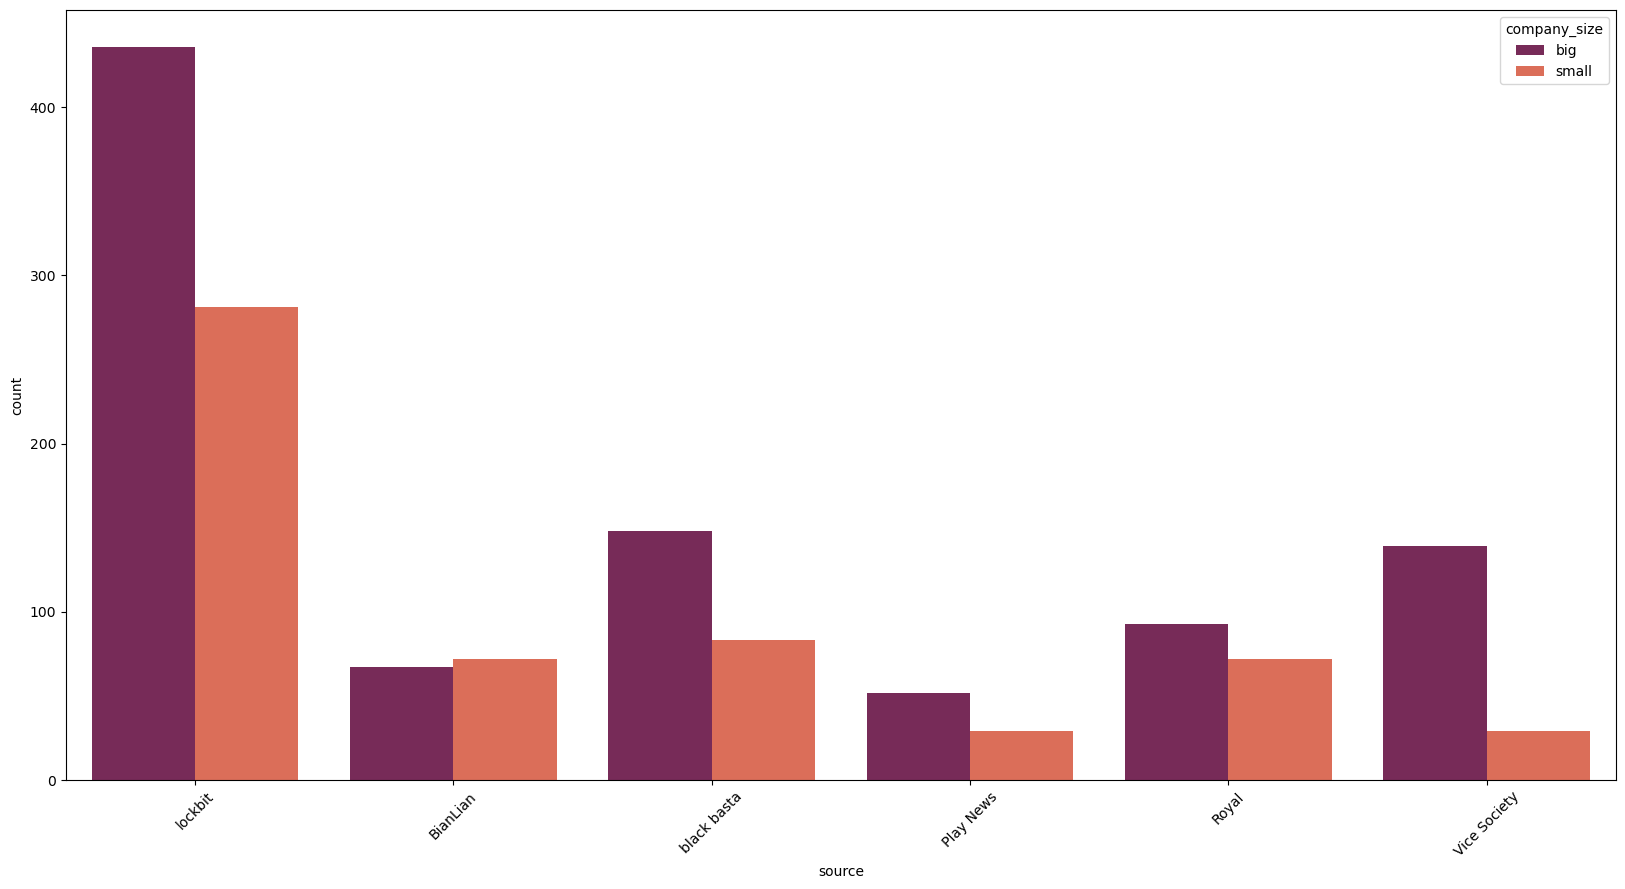

In [41]:
df_new = df_attacked.copy()
# draw stacked bar plot of source vs company_size
plt.figure(figsize=(20, 10))
sns.countplot(x='source', data=df_new, hue='company_size', palette='rocket')
plt.xticks(rotation=45)
plt.show()

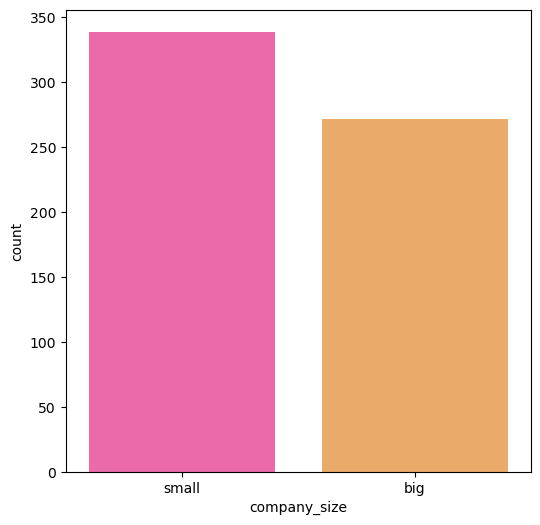

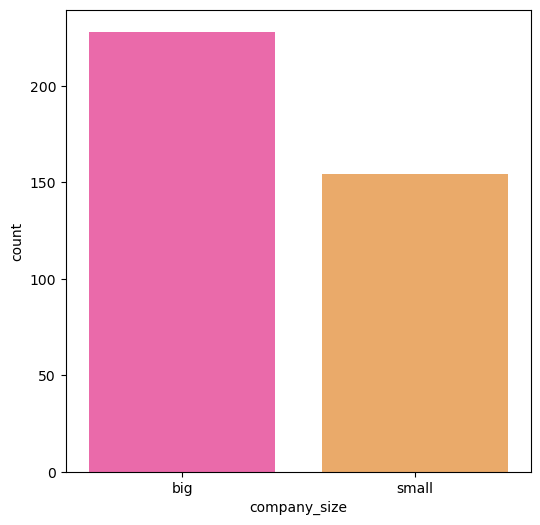

In [42]:
# drow count chart for the company size in usa only
df_usa = df_attacked[df_attacked['country'] == 'United States']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_usa, palette='spring', linewidth=1, order=df_usa['company_size'].value_counts().index)
plt.show()

# drow count chart for the company size in europe only
df_europe = df_attacked[df_attacked['country_type'] == 'european']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_europe, palette='spring', linewidth=1, order=df_europe['company_size'].value_counts().index)
plt.show()

In [44]:
# drow count chart for the company size in usa only
df_usa = df_unattacked[df_unattacked['country'] == 'United States']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_usa, palette='spring', linewidth=1, order=df_usa['company_size'].value_counts().index)
plt.show()

# drow count chart for the company size in europe only
df_europe = df_unattacked[df_unattacked['country_type'] == 'european']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_europe, palette='spring', linewidth=1, order=df_europe['company_size'].value_counts().index)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 600x600 with 0 Axes>

In [ ]:
# applay chi2 test to test our hypothesis
attacked_usa = df_attacked[df_attacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[2]
attacked_europe = df_attacked[df_attacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[0]
print(attacked_usa, attacked_europe)

unattacked_usa = df_unattacked[df_unattacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[2]
unattacked_europe = df_unattacked[df_unattacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[0]
print(unattacked_usa, unattacked_europe)

table = [[attacked_usa, attacked_europe], [unattacked_usa, unattacked_europe]]
chi2, p, dof, ex = chi2_contingency(table)
print("The p-value is equal to {}".format(p))

339 154
263 55
The p-value is equal to 1.3632153665534083e-05


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Calculate proportion of startups that have been attacked in Europe and USA
prop_europe = len(df_europe[df_europe['company_size']=='small']) / len(df_europe)
prop_usa = len(df_usa[df_usa['company_size']=='small']) / len(df_usa)

#print(prop_europe, prop_usa)
# Calculate sample sizes for Europe and USA
n_europe = len(df_europe)
n_usa = len(df_usa)

# Calculate standard errors for Europe and USA
se_europe = np.sqrt(prop_europe * (1 - prop_europe) / n_europe)
se_usa = np.sqrt(prop_usa * (1 - prop_usa) / n_usa)

# Conduct two-sample proportion test
count = np.array([len(df_europe), len(df_usa)])
nobs = np.array([n_europe, n_usa])
stat, pval = proportions_ztest(count, nobs)

# Print results
print(f"Proportion of startups attacked in Europe: {prop_europe:.4f}")
print(f"Proportion of startups attacked in USA: {prop_usa:.4f}")
print(f"Sample size for Europe: {n_europe}")
print(f"Sample size for USA: {n_usa}")
print(f"Standard error for Europe: {se_europe:.4f}")
print(f"Standard error for USA: {se_usa:.4f}")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Proportion of startups attacked in Europe: 0.4167
Proportion of startups attacked in USA: 0.5632
Sample size for Europe: 132
Sample size for USA: 467
Standard error for Europe: 0.0429
Standard error for USA: 0.0230
Test statistic: nan
P-value: nan


c:\Users\Nada\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning:

invalid value encountered in double_scalars



In [45]:
# fill the missing values in 'employees_range' column using KNN imputer and the columns 'country', 'branches_count', 'revenue_range'
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_attacked_fill_missings = df_attacked.copy()
# drop nan values from the columns 'country'
df_attacked_fill_missings = df_attacked_fill_missings.dropna(subset=['country'])

# get the knn imputer
df_attacked_fill_missings = df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]]
# convert the 'revenue_range' column from Series object to categorical codes
df_attacked_fill_missings['country'] = df_attacked_fill_missings['country'].astype('category').cat.codes
df_attacked_fill_missings['branches_count'] = df_attacked_fill_missings['branches_count'].astype('category').cat.codes
df_attacked_fill_missings['revenue_range'] = df_attacked_fill_missings['revenue_range'].astype('category').cat.codes
df_attacked_fill_missings['employees_range'] = df_attacked_fill_missings['employees_range'].astype('category').cat.codes
df_attacked_fill_missings['industry'] = df_attacked_fill_missings['industry'].astype('category').cat.codes
# fit the knn imputer
knn_imputer.fit(df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
# fill the missing values with the knn imputer
df_attacked_fill_missings=knn_imputer.transform(df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
df_attacked_fill_missings=pd.DataFrame(df_attacked_fill_missings, columns=["country","branches_count", "revenue_range","employees_range", "industry", "year_founded"])


In [56]:
# perform chi2 test to get the correlation between all categorical variables in the dataset
from scipy.stats import chi2_contingency
# get the categorical columns
categorical_columns = df_attacked_fill_missings.columns
# create a dataframe to store the chi2 test results
chi2_test_results = pd.DataFrame(columns=categorical_columns)
# loop through the categorical columns and perform chi2 test
for column1 in categorical_columns:
    ps = []
    for column2 in categorical_columns:
        p = -1
        if column1 != column2:
            table = pd.crosstab(df_attacked_fill_missings[column1], df_attacked_fill_missings[column2])
            chi2, p, dof, ex = chi2_contingency(table)
        ps.append(p)
    chi2_test_results = chi2_test_results.append(pd.DataFrame([ps], columns=categorical_columns, index=[column1]))


C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\2029945613.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\2029945613.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\2029945613.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\2029945613.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Nada\AppData\Local\Temp\ipykernel_4120\2029945613.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

KeyError: 'p-value'

In [57]:
chi2_test_results

,country,branches_count,revenue_range,employees_range,industry,year_founded
country,-1,1.000000,4.134557e-02,8.493368e-19,1.511535e-01,9.310445e-01
branches_count,1.0,-1.000000,9.999997e-01,1.000000e+00,3.689551e-04,1.000000e+00
revenue_range,0.041346,1.000000,-1.000000e+00,4.115232e-01,0.000000e+00,1.338983e-45
employees_range,0.0,1.000000,4.115232e-01,-1.000000e+00,1.000000e+00,6.104370e-06
industry,0.151153,0.000369,0.000000e+00,1.000000e+00,-1.000000e+00,3.671248e-123
year_founded,0.931045,1.000000,1.338983e-45,6.104370e-06,3.671248e-123,-1.000000e+00


In [ ]:
df_attacked_fill_missings.head()

,country,branches_count,revenue_range,employees_range,industry,year_founded
0,73.0,0.0,-1.0,4.0,-1.0,1993.4
1,73.0,4.0,21.0,16.0,1.0,1986.0
2,30.0,0.0,23.0,33.0,23.0,1994.0
3,4.0,0.0,-1.0,107.0,-1.0,2003.4
4,46.0,0.0,21.0,11.0,1.0,1945.0


In [ ]:
# check the missing values
df_attacked_fill_missings.isnull().sum()

country            0
branches_count     0
revenue_range      0
employees_range    0
industry           0
year_founded       0
dtype: int64

In [ ]:
#unattacked data
df_unattacked_fill_missings = df_unattacked.copy()
df_unattacked_fill_missings["revenue_range"] = df_unattacked_fill_missings["revenue_range"].apply(convert_revenue_range_to_average)
df_unattacked_fill_missings["employees_range"] = df_unattacked_fill_missings["employees_range"].apply(convert_range_employee_to_average)
# drop nan values from the columns 'country'
df_unattacked_fill_missings = df_unattacked_fill_missings.dropna(subset=['country'])

# get the knn imputer
df_unattacked_fill_missings = df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]]
# remove the outliers from 'revenue_range' column using percentile approach and remove the outliers from 'employees_range' column using percentile approach and remove the outliers from 'year_founded' column using percentile approach
q1 = df_unattacked_fill_missings['revenue_range'].quantile(0.1)
q3 = df_unattacked_fill_missings['revenue_range'].quantile(0.9)
df_attacked_fill_missings = df_attacked_fill_missings[(df_attacked_fill_missings['revenue_range'] >= q1) & (df_attacked_fill_missings['revenue_range'] <= q3)]
q1 = df_unattacked_fill_missings['employees_range'].quantile(0.25)
q3 = df_unattacked_fill_missings['employees_range'].quantile(0.75)
iqr = q3 - q1
df_unattacked_fill_missings = df_unattacked_fill_missings[(df_unattacked_fill_missings['employees_range'] >= q1 - 1.5 * iqr) & (df_unattacked_fill_missings['employees_range'] <= q3 + 1.5 * iqr)]
q1 = df_unattacked_fill_missings['year_founded'].quantile(0.25)
q3 = df_unattacked_fill_missings['year_founded'].quantile(0.75)
iqr = q3 - q1
df_unattacked_fill_missings = df_unattacked_fill_missings[(df_unattacked_fill_missings['year_founded'] >= q1 - 1.5 * iqr) & (df_unattacked_fill_missings['year_founded'] <= q3 + 1.5 * iqr)]
# convert the 'revenue_range' column from Series object to categorical codes
df_unattacked_fill_missings['country'] = df_unattacked_fill_missings['country'].astype('category').cat.codes
df_unattacked_fill_missings['branches_count'] = df_unattacked_fill_missings['branches_count'].astype('category').cat.codes
df_unattacked_fill_missings['revenue_range'] = df_unattacked_fill_missings['revenue_range'].astype('category').cat.codes
df_unattacked_fill_missings['employees_range'] = df_unattacked_fill_missings['employees_range'].astype('category').cat.codes
df_unattacked_fill_missings['industry'] = df_unattacked_fill_missings['industry'].astype('category').cat.codes
# fit the knn imputer
knn_imputer.fit(df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
# fill the missing values with the knn imputer
df_unattacked_fill_missings=knn_imputer.transform(df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
df_unattacked_fill_missings=pd.DataFrame(df_unattacked_fill_missings, columns=["country","branches_count", "revenue_range", "industry", "employees_range", "year_founded"])


In [ ]:
df_unattacked_fill_missings.head()

,country,branches_count,revenue_range,industry,employees_range,year_founded
0,39.0,0.0,1.0,37.0,1.0,2001.0
1,21.0,0.0,3.0,-1.0,3.0,2017.0
2,39.0,0.0,1.0,15.0,1.0,1984.0
3,39.0,2.0,1.0,11.0,1.0,2015.0
4,32.0,0.0,0.0,14.0,0.0,2002.0


In [ ]:
# check the missing values
df_unattacked_fill_missings.isnull().sum()


country            0
branches_count     0
revenue_range      0
industry           0
employees_range    0
year_founded       0
dtype: int64

In [ ]:
# use logistic regression to predict if the company will be attacked or not
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# compine the attacked and unattacked data
df_attacked_fill_missings['attacked'] = 1
df_unattacked_fill_missings['attacked'] = 0
#concatenate the two dataframes
df_attacked_fill_missings = df_attacked_fill_missings.append(df_unattacked_fill_missings)
# split the data into train and test
y = df_attacked_fill_missings['attacked']
X = df_attacked_fill_missings.drop('attacked', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
# predict the test data
y_pred = logistic_regression.predict(X_test)
# print the accuracy score
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
# print the confusion matrix
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
# print the classification report
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.4522
Confusion matrix:
[[35 43]
 [43 36]]
Classification report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        78
           1       0.46      0.46      0.46        79

    accuracy                           0.45       157
   macro avg       0.45      0.45      0.45       157
weighted avg       0.45      0.45      0.45       157



C:\Users\Nada\AppData\Local\Temp\ipykernel_9140\3023437099.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# get the companies whose last_seen is before today
df_attacked['last_seen'] = pd.to_datetime(df_attacked['last_seen'])
# get the day of ["last_seen"]
df_attacked['last_seen_day'] = df_attacked['last_seen'].dt.day
# get the month of ["last_seen"]
df_attacked['last_seen_month'] = df_attacked['last_seen'].dt.month
# get the year of ["last_seen"]
df_attacked['last_seen_year'] = df_attacked['last_seen'].dt.year
# get the company that paid, a company who has paid is the company whose last_seen is before the max date
date = df_attacked['last_seen'].max()

df_paid = df_attacked[((df_attacked['last_seen_day']< date.day) & 
(df_attacked['last_seen_month']== date.month) )|
 (df_attacked['last_seen_month']< date.month) | (df_attacked['last_seen_year']< date.year)]
df_paid.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,revenue_range,source,technologies_used,views,year_founded,country_type,company_size,last_seen_day,last_seen_month,last_seen_year
9,645655097adef2f79c969d36,1.0,baysideinteriors.com,active,Bayside started in 1984 as a Northern Californ...,United States,"12 May, 2023 12:30:36 UTC",Contractor specializing in the following: \r\n...,"Bayside Interiors, Inc.",NaN,...,10M - 50M,lockbit,"[""WooCommerce"",""WordPress""]",6467.0,1984.0,usa,big,11,5,2023
31,645655937adef2f79c969d4c,0.0,abro.se,active,136gb,Sweden,"09 May, 2023 03:14:19 UTC",Åbro Bryggeri är Sveriges äldsta familjebrygge...,AB Åbro Bryggeri,89,...,10M - 50M,lockbit,"[""Google Analytics"",""MaxCDN""]",4627.0,1856.0,european,small,9,5,2023
53,645658397adef2f79c969d62,0.0,bancodevenezuela.com,active,We are an institution with a long history in t...,NaN,"10 May, 2023 06:27:47 UTC",NaN,Banco de Venezuela,NaN,...,NaN,lockbit,"[""Google Analytics"",""WordPress""]",5626.0,NaN,other,big,9,5,2023
551,6456aaf0c1c9cd75f3a96c4e,NaN,moci.gov.kw,NaN,11782 files,NaN,"14 Apr, 2023 15:36:39 UTC",NaN,NaN,NaN,...,NaN,lockbit,[],7183.0,NaN,other,big,13,5,2023
611,6456b3b1c1c9cd75f3a96c8a,1.0,chahousing.org,active,"The Chattanooga Housing Authority (CHA), chart...",United States,"19 Nov, 2022 04:01:05 UTC",The Chattanooga Housing Authority (CHA) opened...,CHATTANOOGA HOUSING AUTHORITY,NaN,...,10M - 50M,lockbit,"[""Google Analytics"",""Google DoubleClick"",""Goog...",19785.0,1938.0,usa,small,13,5,2023


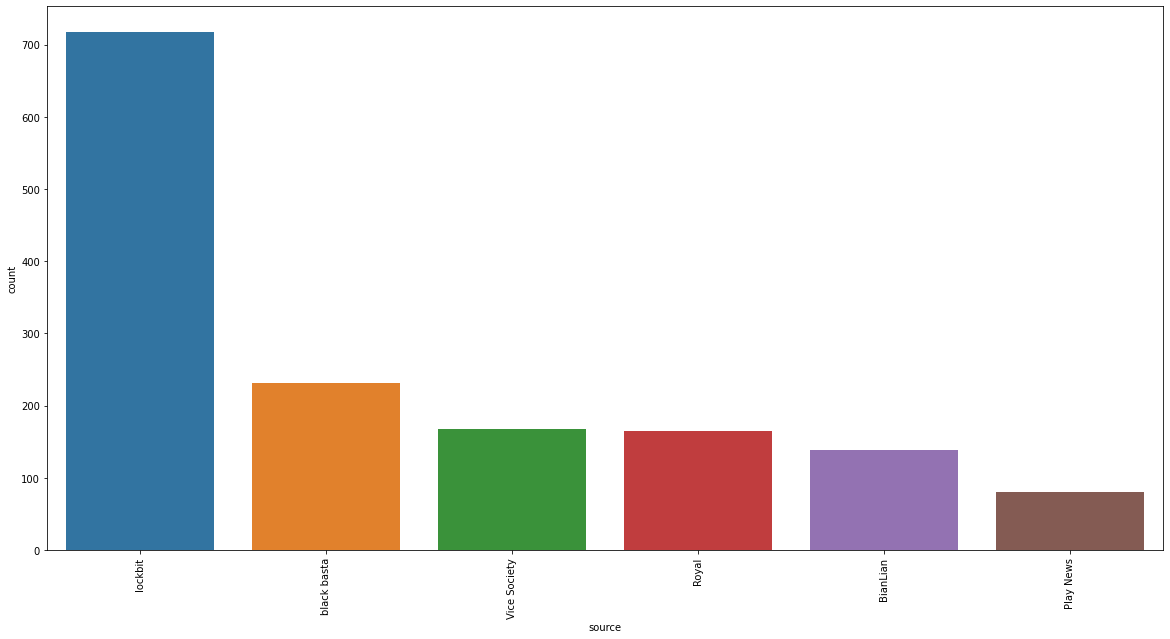

In [ ]:

# plot the number of samples for each source and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='source', data=df_attacked, order=df_attacked['source'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# in which region each source is interested in?
# get the unique values for 'source' column
print(df_attacked['source'].unique())
# get the unique values for 'country' column
print(df_attacked['country'].unique())
# count the number of samples for each source and country
df_source_country = df_attacked.groupby(['source', 'country']).size().reset_index(name='counts')
# sort the values by counts in descending order
df_source_country = df_source_country.sort_values(by='counts', ascending=False)
df_source_country.head(10)
# get the top 1 country for each source
df_source_country = df_source_country.groupby('source').head(1)
df_source_country.head(10)

['lockbit' 'BianLian' 'black basta' 'Play News' 'Royal' 'Vice Society']
['United States' 'India' 'Austria' 'Mexico' 'Italy' 'Belgium' 'Pakistan'
 'Spain' 'Malaysia' 'Morocco' 'Croatia' 'France' 'Germany' 'Hong Kong'
 'Colombia' 'Canada' 'Sweden' 'Japan' 'Kuwait' 'United Arab Emirates'
 'United Kingdom' 'Argentina' 'Switzerland' 'Angola' 'Romania' 'Brazil'
 'Israel' nan 'Bangladesh' 'Thailand' 'Poland' 'Peru' 'Philippines'
 'Vietnam' 'Czech Republic' 'South Africa' 'Australia' 'Taiwan' 'Lebanon'
 'Slovakia' 'Singapore' 'Jordan' 'Netherlands' 'Luxembourg' 'Portugal'
 'Indonesia' 'China' 'Albania' 'Trinidad and Tobago' 'Saudi Arabia'
 'Venezuela' 'New Zealand' 'Monaco' 'Kenya' 'Jamaica' 'Ecuador' 'Norway'
 'Chile' 'Korea, Republic of' 'Costa Rica' 'Turkey' 'Qatar' 'Bulgaria'
 'Nicaragua' 'Ireland' 'Guatemala' 'Barbados'
 'Macedonia, the former Yugoslav Republic of' 'Cyprus'
 'Dominican Republic' 'Grenada' 'Finland' 'Denmark' 'Liechtenstein'
 'Hungary' 'Greece' 'Greenland']


,source,country,counts
171,lockbit,United States,221
106,black basta,United States,139
58,Royal,United States,103
15,BianLian,United States,79
89,Vice Society,United States,48
40,Play News,United States,21


Accuracy score: 0.7080
Confusion matrix:
[[ 67  85]
 [ 87 350]]
Classification report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44       152
           1       0.80      0.80      0.80       437

    accuracy                           0.71       589
   macro avg       0.62      0.62      0.62       589
weighted avg       0.71      0.71      0.71       589



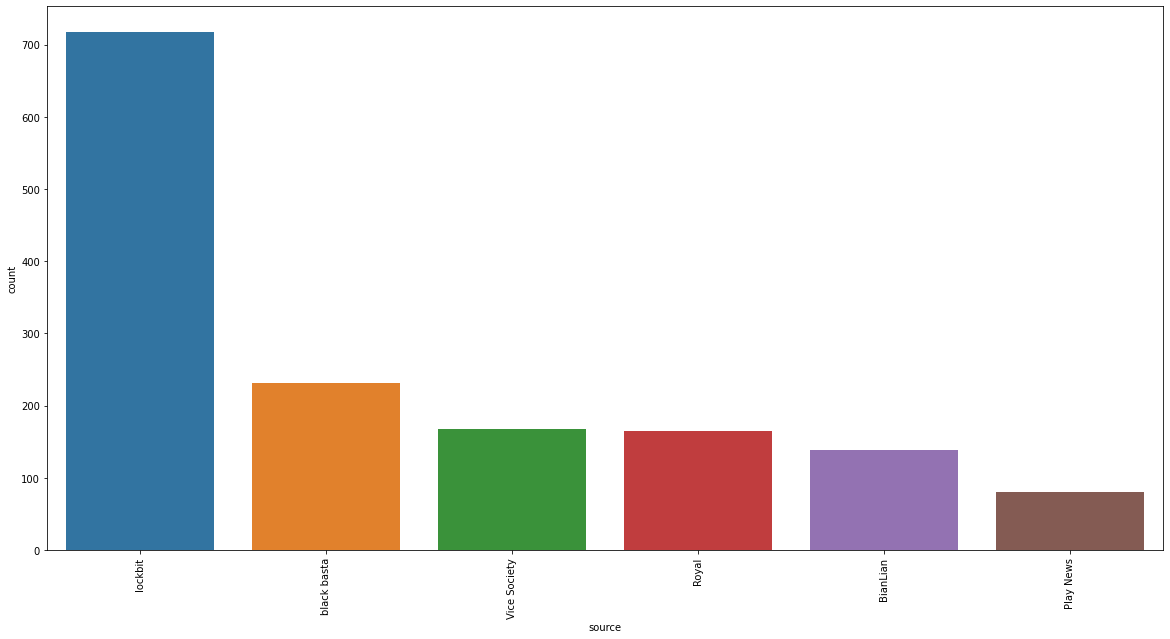